We will start by importing the requisite libraries for reading in our csv data and working with data cleaning and exploratory data analysis.

In [1341]:
# import libraries and read files as data frames and do EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will write our first version of a function to read in the csv files one year at a time, concatening each of the four quarters into a single annual dataframe. The reason for reading in one year at a time is because based on a cursory look at the csv files, it appears that the San Francisco city government did not maintain consistent record-keeping for each of these data columns from year to year (and perhaps not even quarter to quarter). Although the data dictionary is relatively the same from the fourth quarter of 2017 through 2022, there are some clear differences in naming conventions, as well as obvious typos. We will go about cleaning the data with consistent column naming one year at a time, trying to keep previous years aligned with the 2022 data dictionary, as the most recent and robust dataset.

In [1342]:
# define a function to read in one year of data at a time.
def annual_data_1(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    # returns the data frame for the year
    return dev_projs

In [1343]:
# reads in the 2022 dataset
dev_projs_2022 = annual_data_1(2022)

In [1344]:
# previews the 2022 data frame
dev_projs_2022.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods
0,1079,Resident,1690032,836 48TH AV,True,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,True,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,True,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,7841,Resident,6729067,49 SUSSEX ST,True,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,True,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN


In [1345]:
dev_projs_2022.shape

(8607, 73)

In [1346]:
# displays columns with highest number of null values
dev_projs_2022.isnull().sum().sort_values(ascending = False).head(50)

recreationandparksproperties    8604
tcocfcdate                      8488
afftarget                       8416
tenuretype                      8333
statedensityall                 8319
section415                      8292
da                              8229
contact                         6506
tcocfcunits                     6406
affprojection                   6353
sponsor                         4930
visitexist                      4711
hotelroomexist                  3118
hotelroomnet                    3117
hotelroomprop                   3117
medexist                        3074
cieexist                        3072
pdrexist                        3061
mipsexist                       3057
retexist                        3040
cie                             3004
pdr                             2965
mips                            2898
contactph                       2766
affordablenet                   2622
dbidesc                         2306
totalgsf                        2284
s

Before diving deep into the data, we wanted to observe briefly which columns may be so new in the 2022 dataset that they might be irrelevant for our analysis later in that they will contain nulls across multiple years since they were not being recorded earlier. Those columns with greater than 8,000 nulls may be so new in record-keeping that any values may not provide insight into our trends over time.

Next, we will begin by making a set of all the column names in this 2022 dataset for the sake of comparison momentarily with the 2021 dataset.

In [1347]:
# creates a set of 2022 columns and previews the full set.
columns_2022 = set(dev_projs_2022.columns)

columns_2022

{'adu',
 'affordablenet',
 'affprojection',
 'afftarget',
 'analysisneighborhoods',
 'bestdate',
 'beststat',
 'blklot',
 'bpapplno',
 'caseno',
 'cie',
 'cieexist',
 'cienet',
 'contact',
 'contactph',
 'currentpolicedistricts',
 'currentsupervisordistricts',
 'da',
 'dbidesc',
 'descript',
 'entitled',
 'heightbul',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'landuse',
 'latitude',
 'latlong',
 'legalization',
 'longitude',
 'med',
 'medexist',
 'mednet',
 'mips',
 'mipsexist',
 'mipsnet',
 'nameaddr',
 'neighborhoods',
 'netgsf',
 'nhood37',
 'nhood41',
 'objectid',
 'pd',
 'pda',
 'pdr',
 'pdrexist',
 'pdrnet',
 'pipelineunits',
 'planner',
 'plans',
 'qtr',
 'recreationandparksproperties',
 'ret',
 'retexist',
 'retnet',
 'sd22',
 'section415',
 'sffindneighborhoods',
 'sponsor',
 'statedensityall',
 'sud',
 'tcocfcdate',
 'tcocfcunits',
 'tenuretype',
 'totalgsf',
 'units',
 'unitsnet',
 'visit',
 'visitexist',
 'visitnet',
 'year',
 'yearqtr',
 'zoning'}

While it may seem tedious, we may need to refer to this list consistently as we begin cleaning up previous years of data since we will be using the 2022 columns as our main point of reference with which to concatenate all previous years. We can see at first glance that we have successfully standardized all column names by eliminating any white space or punctuation and changing all to lower case.

Now we will read in the 2021 dataset and begin comparing both data frames' columns for renaming and concatenating into a single dataset.

In [1348]:
# reads in the 2021 dataset
dev_projs_2021 = annual_data_1(2021)

In [1349]:
#previews the 2021 dataset
dev_projs_2021.head()

,thegeom,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdat,tcocfcuni,...,descript,dbidesc,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,objectid,tcodate,tcounit
0,POINT (-122.50633085710433 37.74191375759742),Resident,2376024,3734 TARAVAL ST,0,BP FILED,02/28/2017 12:00:00 AM,3,NaN,NaN,...,NaN,ORD 43-14. LEGALIZATION OF GROUND FLOOR UNIT P...,39,39,10.0,7,35.0,NaN,NaN,NaN
1,POINT (-122.43015492543591 37.72260520266989),Resident,6019037,394 NAPLES ST,0,BP Filed,10/15/2020 12:00:00 AM,3,NaN,NaN,...,NaN,LEGALIZATION OF (E) FIRST FLOOR UNIT PER ORDIN...,90,90,9.0,1,7.0,NaN,NaN,NaN
2,POINT (-122.46817285371934 37.77994949193859),Resident,1535034,442 10TH AV,0,BP Filed,10/16/2018 12:00:00 AM,3,NaN,NaN,...,NaN,ADD (N) UNIT @ BASEMENT W/ 2 BEDROOMS AND 1 BA...,5,5,8.0,4,11.0,NaN,NaN,NaN
3,POINT (-122.48612805242004 37.75021781237656),Resident,2106016,2400 PACHECO ST,0,BP Filed,10/14/2020 12:00:00 AM,2,NaN,NaN,...,NaN,Convert existing unfinished ground floor space...,39,39,10.0,7,35.0,NaN,NaN,NaN
4,POINT (-122.43622781117296 37.7888876169925),Resident,0634008,2536 CALIFORNIA ST,0,BP Filed,08/09/2021 12:00:00 AM,1,NaN,NaN,...,The project proposes to demolish the existing ...,"ERECT NEW 4-STORY OVER BASEMENT, TYPE 5B, SING...",102,102,4.0,6,30.0,NaN,NaN,NaN


In [1350]:
dev_projs_2021.shape

(9484, 75)

Notice how we have nearly the same number of columns as 2022 with 75 instead of 73. However, just looking at the head of both data frames, we already see differences in name conventions. For example, the same "latlong" data in 2022 is named "thegeom" in 2021. Additionally, we can see columns "tcocfcdat" and "tcocfcuni" in 2021 which may be typos for similar columns in 2022.

We shall compare the sets of column names from both years and rewrite our data reading function to rename columns in 2021 for alignment with 2022.

In [1351]:
# displays the columns with the most null values
dev_projs_2021.isnull().sum().sort_values(ascending = False).head(50)

tcodate                       9452
tcocfcdat                     9396
tenuretyp                     9305
afftarget                     9209
da                            9129
section415                    9111
objectid1                     7088
contact                       6551
sud                           6211
plans                         5787
sponsor                       5515
contactph                     3630
tcounit                       2396
objectid                      2396
restaurant                    2393
tcocfcuni                     2366
cie                           2217
pdr                           2179
dbidesc                       1780
pda                           1559
planner                       1514
descript                      1236
caseno                         953
cienet                         644
pdrnet                         618
restaura1                      259
landuse                         34
blklot                           8
nhood37             

In [1352]:
# creates a set of 2021 column names
columns_2021 = set(dev_projs_2021.columns)

In [1353]:
# displays the 2022 column names which are missing from 2021
set(columns_2022 - columns_2021)

{'affordablenet',
 'affprojection',
 'bpapplno',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'latlong',
 'legalization',
 'pipelineunits',
 'recreationandparksproperties',
 'sd22',
 'statedensityall',
 'tcocfcdate',
 'tcocfcunits',
 'tenuretype',
 'visitexist'}

In [1354]:
# displays the 2021 column names which are missing from 2022
set(columns_2021 - columns_2022)

{'affordab1',
 'affordable',
 'hotelro1',
 'hotelro2',
 'hotelroom',
 'legalizati',
 'objectid1',
 'pipelineu',
 'restaura1',
 'restaurant',
 'sd',
 'tcocfcdat',
 'tcocfcuni',
 'tcodate',
 'tcounit',
 'tenuretyp',
 'thegeom',
 'visitexis'}

Before exploring some of these columns in more detail, we will note that almost all of the inconsistent column names are clear typos in 2021. Therefore, "legalizati," "objectid1," "pipelineu," "sd," "tenuretyp," and "visitexis" will all be renamed to fix the typos. Next, we may have some duplication or renaming of data for affordable housing, hotel rooms, and tcocfc units and dates. We will explore these three groups of data first to determine renaming conventions here.

In [1355]:
# displays the nulls in columns of interest
dev_projs_2021[['affordab1', 
                'affordable', 
                'hotelro1', 
                'hotelro2', 
                'hotelroom', 
                'tcocfcdat', 
                'tcocfcuni', 
                'tcodate', 
                'tcounit']].isnull().sum()

affordab1        0
affordable       0
hotelro1         0
hotelro2         0
hotelroom        0
tcocfcdat     9396
tcocfcuni     2366
tcodate       9452
tcounit       2396
dtype: int64

In [1356]:
# displays the summary stats in columns of interest
dev_projs_2021[['affordab1', 
                'affordable', 
                'hotelro1', 
                'hotelro2', 
                'hotelroom', 
                'tcocfcdat', 
                'tcocfcuni', 
                'tcodate', 
                'tcounit']].describe()

,affordab1,affordable,hotelro1,hotelro2,hotelroom,tcocfcuni,tcounit
count,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,7118.000000,7088.000000
mean,5.465521,6.384437,3.119464,2.892450,0.227014,1.407839,0.319554
std,67.060619,81.120527,28.939161,26.959608,7.327821,18.727500,6.591095
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2565.000000,3077.000000,516.000000,500.000000,342.000000,550.000000,263.000000


In [1357]:
# displays the nulls in columns of interest
dev_projs_2022[['affordablenet',  
                'hotelroomexist', 
                'hotelroomprop', 
                'hotelroomnet', 
                'tcocfcdate', 
                'tcocfcunits']].isnull().sum()

affordablenet     2622
hotelroomexist    3118
hotelroomprop     3117
hotelroomnet      3117
tcocfcdate        8488
tcocfcunits       6406
dtype: int64

In [1358]:
# displays the summary stats in columns of interest
dev_projs_2022[['affordablenet', 
                'hotelroomexist', 
                'hotelroomprop', 
                'hotelroomnet', 
                'tcocfcdate', 
                'tcocfcunits']].describe()

,affordablenet,hotelroomexist,hotelroomprop,hotelroomnet,tcocfcunits
count,5985.000000,5489.000000,5490.000000,5490.000000,2201.000000
mean,10.308939,0.350337,4.022040,3.671767,4.327124
std,90.462559,9.571536,34.635384,31.930994,29.152986
min,-1.000000,0.000000,0.000000,-130.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,3077.000000,342.000000,516.000000,500.000000,395.000000


Based on what we see from the summary statistics above and the nulls in comparison in both data frames, we can make some assumptions about the data for the purposes of cleaning.

First, regarding the "affordab1" and "affordable" columns in 2021, "affordab1" is most likely the "affordablenet" column in 2022 since there is a negative minimum value for "affordab1" in 2021. We will rename this column from previous years as such. For the "affordable" column, according to our diverging data dictionaries in the years prior to 2022, there was a separate data column for the total number of affordable units, not just the net affordable units constructed. Since this project is regarding the construction of housing stock in general and affordable housing stock in particular, we will in this case maintain the prior years' convention and continue to keep an "affordable" column. In our exploratory data analysis later, we will compare these two columns from previous years to make an assumption about how to impute reasonable values to the year 2022, if necessary.

Next, looking at our summary statistics for the hotel room data columns, we can see identical maxima across the two years, so we can easily assume that these are the same construction projects carrying from one year to the next and rename the columns accordingly.

Finally, regarding the TCO vs. TCOCFC data, we can see nearly identical nulls missing from similarly named columns in 2021. Those with the typos but named TCOCFC instead of just TCO appear to have slightly less nulls, albeit quite few. Since out comparison in summary statistics across years does not yield an exact comparison, we will assume that we are comparing the TCOCFC units and dates across years due to the same naming conventions and rename the columns in 2021 accordingly. We will also assume that we can drop the TCO columns.

Additionally, there are a couple columns in 2022 such as the restaurants column which we will drop entirely, as are no longer used in 2022 and are not central to our housing analysis.

We shall rewrite our function with the renaming conventions outlined above and then concatenate the 2021 and 2022 years of data.

In [1359]:
# define a function to read in one year of data at a time.
def annual_data_2(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # identifies columns for renaming
        new_data.rename(columns = {'affordab1': 'affordablenet', 
                                   'hotelro1': 'hotelroomprop',
                                   'hotelro2': 'hotelroomnet',
                                   'hotelroom': 'hotelroomexist',
                                   'legalizati': 'legalization',
                                   'objectid1': 'objectid',
                                   'pipelineu': 'pipelineunits',
                                   'sd': 'sd22',
                                   'tcocfcdat': 'tcocfcdate',
                                   'tcocfcuni': 'tcocfcunits',
                                   'tenuretyp': 'tenuretype',
                                   'thegeom': 'latlong',
                                   'visitexis': 'visitexist'
                                  }, inplace = True)
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    # returns the data frame for the year
    return dev_projs

In [1360]:
# reads in 2022 data using the new function
dev_projs_2022 = annual_data_2(2022)

In [1361]:
# previews the 2022 dataset
dev_projs_2022.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods
0,1079,Resident,1690032,836 48TH AV,True,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,True,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,True,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,7841,Resident,6729067,49 SUSSEX ST,True,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,True,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN


In [1362]:
# reads in the 2021 data using the new function
dev_projs_2021 = annual_data_2(2021)

In [1363]:
# previews the 2021 dataset
dev_projs_2021.head()

,latlong,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,objectid,descript,dbidesc,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,tcodate,tcounit
0,POINT (-122.50633085710433 37.74191375759742),Resident,2376024,3734 TARAVAL ST,0,BP FILED,02/28/2017 12:00:00 AM,3,NaN,NaN,...,8104,NaN,ORD 43-14. LEGALIZATION OF GROUND FLOOR UNIT P...,39,39,10.0,7,35.0,NaN,NaN
1,POINT (-122.43015492543591 37.72260520266989),Resident,6019037,394 NAPLES ST,0,BP Filed,10/15/2020 12:00:00 AM,3,NaN,NaN,...,10768,NaN,LEGALIZATION OF (E) FIRST FLOOR UNIT PER ORDIN...,90,90,9.0,1,7.0,NaN,NaN
2,POINT (-122.46817285371934 37.77994949193859),Resident,1535034,442 10TH AV,0,BP Filed,10/16/2018 12:00:00 AM,3,NaN,NaN,...,9175,NaN,ADD (N) UNIT @ BASEMENT W/ 2 BEDROOMS AND 1 BA...,5,5,8.0,4,11.0,NaN,NaN
3,POINT (-122.48612805242004 37.75021781237656),Resident,2106016,2400 PACHECO ST,0,BP Filed,10/14/2020 12:00:00 AM,2,NaN,NaN,...,10682,NaN,Convert existing unfinished ground floor space...,39,39,10.0,7,35.0,NaN,NaN
4,POINT (-122.43622781117296 37.7888876169925),Resident,0634008,2536 CALIFORNIA ST,0,BP Filed,08/09/2021 12:00:00 AM,1,NaN,NaN,...,10961,The project proposes to demolish the existing ...,"ERECT NEW 4-STORY OVER BASEMENT, TYPE 5B, SING...",102,102,4.0,6,30.0,NaN,NaN


In [1364]:
# drops columns from 2021 which will not be used with 2022 dataset
dev_projs_2021.drop(columns = ['restaura1', 
                               'restaurant', 
                               'tcodate', 
                               'tcounit'], inplace = True)

In [1365]:
# previews 2021 dataset after dropped columns
dev_projs_2021.head()

,latlong,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,latitude,longitude,objectid,descript,dbidesc,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,POINT (-122.50633085710433 37.74191375759742),Resident,2376024,3734 TARAVAL ST,0,BP FILED,02/28/2017 12:00:00 AM,3,NaN,NaN,...,37.741914,-122.506331,8104,NaN,ORD 43-14. LEGALIZATION OF GROUND FLOOR UNIT P...,39,39,10.0,7,35.0
1,POINT (-122.43015492543591 37.72260520266989),Resident,6019037,394 NAPLES ST,0,BP Filed,10/15/2020 12:00:00 AM,3,NaN,NaN,...,37.722605,-122.430155,10768,NaN,LEGALIZATION OF (E) FIRST FLOOR UNIT PER ORDIN...,90,90,9.0,1,7.0
2,POINT (-122.46817285371934 37.77994949193859),Resident,1535034,442 10TH AV,0,BP Filed,10/16/2018 12:00:00 AM,3,NaN,NaN,...,37.779949,-122.468173,9175,NaN,ADD (N) UNIT @ BASEMENT W/ 2 BEDROOMS AND 1 BA...,5,5,8.0,4,11.0
3,POINT (-122.48612805242004 37.75021781237656),Resident,2106016,2400 PACHECO ST,0,BP Filed,10/14/2020 12:00:00 AM,2,NaN,NaN,...,37.750218,-122.486128,10682,NaN,Convert existing unfinished ground floor space...,39,39,10.0,7,35.0
4,POINT (-122.43622781117296 37.7888876169925),Resident,0634008,2536 CALIFORNIA ST,0,BP Filed,08/09/2021 12:00:00 AM,1,NaN,NaN,...,37.788888,-122.436228,10961,The project proposes to demolish the existing ...,"ERECT NEW 4-STORY OVER BASEMENT, TYPE 5B, SING...",102,102,4.0,6,30.0


In [1366]:
# concatenates the 2022 and 2021 dataframes into one
sf_dev_projs = pd.concat([dev_projs_2022, dev_projs_2021], sort = False, ignore_index = True)

sf_dev_projs.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN


Looking at our newly concatenated data frame, we can observe only one extra column in comparison to the original 2022 data frame which is our "affordable" column from 2021. Otherwise, we have successfully aligned all columns from 2022 into 2021.

We shall now continue with reading in 2020 data and comparing to our new concatenated data with both years 2022 and 2021.

In [1367]:
# creates a set of 2022/21 columns and shows column names
columns_sf = set(sf_dev_projs.columns)

columns_sf

{'adu',
 'affordable',
 'affordablenet',
 'affprojection',
 'afftarget',
 'analysisneighborhoods',
 'bestdate',
 'beststat',
 'blklot',
 'bpapplno',
 'caseno',
 'cie',
 'cieexist',
 'cienet',
 'contact',
 'contactph',
 'currentpolicedistricts',
 'currentsupervisordistricts',
 'da',
 'dbidesc',
 'descript',
 'entitled',
 'heightbul',
 'hotelroomexist',
 'hotelroomnet',
 'hotelroomprop',
 'landuse',
 'latitude',
 'latlong',
 'legalization',
 'longitude',
 'med',
 'medexist',
 'mednet',
 'mips',
 'mipsexist',
 'mipsnet',
 'nameaddr',
 'neighborhoods',
 'netgsf',
 'nhood37',
 'nhood41',
 'objectid',
 'pd',
 'pda',
 'pdr',
 'pdrexist',
 'pdrnet',
 'pipelineunits',
 'planner',
 'plans',
 'qtr',
 'recreationandparksproperties',
 'ret',
 'retexist',
 'retnet',
 'sd22',
 'section415',
 'sffindneighborhoods',
 'sponsor',
 'statedensityall',
 'sud',
 'tcocfcdate',
 'tcocfcunits',
 'tenuretype',
 'totalgsf',
 'units',
 'unitsnet',
 'visit',
 'visitexist',
 'visitnet',
 'year',
 'yearqtr',
 'zoning

In [1368]:
# reads in 2020 data and previews data frame
dev_projs_2020 = annual_data_2(2020)

dev_projs_2020.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,cfctcodate,cfctcounits,unitsnet,...,latitude,longitude,location,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,heightbulk,newgeoreferencedcolumn
0,Resident,2155050,2006 36TH AV,0,BP Filed,10/05/2020 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.749505,-122.494151,POINT (-122.494150824 37.7495047093),39.0,39.0,10.0,7.0,35.0,NaN,NaN
1,Mixres,5678031,434 Cortland AVE,0,PL Filed,07/17/2020 12:00:00 AM,4.0,NaN,NaN,4.0,...,37.738863,-122.416916,POINT (-122.416915705 37.7388628418),61.0,61.0,9.0,2.0,2.0,NaN,NaN
2,Resident,4938026A,1115 FITZGERALD AV,0,BP FILED,10/19/2016 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.719910,-122.389964,POINT (-122.389964349 37.7199095399),88.0,88.0,2.0,9.0,1.0,NaN,NaN
3,Resident,7079033,46 BEVERLY ST,0,BP Filed,10/31/2018 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.716953,-122.471347,POINT (-122.471347441 37.716953288),65.0,65.0,10.0,1.0,24.0,NaN,NaN
4,Resident,1256042,1308 MASONIC AVE,0,BP Filed,12/29/2016 12:00:00 AM,5.0,NaN,NaN,0.0,...,37.769029,-122.444749,POINT (-122.444749044 37.7690292374),112.0,112.0,7.0,11.0,3.0,NaN,NaN


In [1369]:
# creates a set of 2020 column names
columns_2020 = set(dev_projs_2020.columns)

In [1370]:
# displays column names present in 2022/21 but not 2020
set(columns_sf - columns_2020)

{'adu',
 'affprojection',
 'bpapplno',
 'latlong',
 'legalization',
 'objectid',
 'recreationandparksproperties',
 'statedensityall',
 'tcocfcdate',
 'tcocfcunits'}

In [1371]:
# displays column names present in 2020 but not 2022/21
set(columns_2020 - columns_sf)

{'cfctcodate',
 'cfctcounits',
 'heightbulk',
 'location',
 'newgeoreferencedcolumn',
 'restaurant',
 'restaurantnet',
 'supname'}

Based on the comparison across both sets of columns in the years 2022/2021, we can see that most of the columns here are new to data collection in latter years which is corroborated by the data dictionaries from 2017 and 2022. It appears "cfctco" was renamed in subsequent years, so we shall rename these columns in our third iteration of our function. We also dropped the restaurant data, so we will drop it again for 2020. Supervisor name also appears as a new data column, but we will drop this column as it is not immediately useful to our analysis. Lastly, we will check "location" and "newgeoreferencedcolumn" to check whether these data match "latlong" in subsequent years.

In [1372]:
# check the shape of the dataset
dev_projs_2020.shape

(9013, 72)

In [1373]:
# display the data type of both columns
dev_projs_2020[['location', 'newgeoreferencedcolumn']].dtypes

location                  object
newgeoreferencedcolumn    object
dtype: object

In [1374]:
# shows the number of nulls in both columns
dev_projs_2020[['location', 'newgeoreferencedcolumn']].isnull().sum()

location                  2217
newgeoreferencedcolumn    6796
dtype: int64

In [1375]:
# displays the head of the data in which the column is not null
dev_projs_2020[dev_projs_2020['newgeoreferencedcolumn'].notna()].head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,cfctcodate,cfctcounits,unitsnet,...,latitude,longitude,location,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,heightbulk,newgeoreferencedcolumn
4565,POINT (-122.4086053 37.80290857),0077004,30 EDITH ST,1,BP ISSUED,2019-05-20 11:01,3.0,NaN,NaN,2.0,...,37.802909,-122.408605,NaN,NaN,NaN,NaN,NaN,NaN,40-X,POINT (-122.4086053 37.80290857)
4566,POINT (-122.4138105 37.79721676),0150054,1000 - 1020 BROADWAY,1,BP FILED,2016-07-12,1.0,NaN,NaN,1.0,...,37.797217,-122.413810,NaN,NaN,NaN,NaN,NaN,NaN,40-X,POINT (-122.4138105 37.79721676)
4567,POINT (-122.4119987 37.78610611),0317005,436 OFARRELL ST,1,CONSTRUCTION,2019-08-28,9.0,NaN,NaN,9.0,...,37.786106,-122.411999,NaN,NaN,NaN,NaN,NaN,NaN,80-T-130-T,POINT (-122.4119987 37.78610611)
4568,POINT (-122.4074423 37.78579904),0327011,72 ELLIS ST,1,CONSTRUCTION,2020-03-31,NaN,NaN,NaN,NaN,...,37.785799,-122.407442,NaN,NaN,NaN,NaN,NaN,NaN,80-130-F,POINT (-122.4074423 37.78579904)
4569,POINT (-122.4113233 37.78188348),0350002,1028 MARKET ST,1,CONSTRUCTION,2020-03-10,186.0,NaN,NaN,186.0,...,37.781883,-122.411323,NaN,NaN,NaN,NaN,NaN,NaN,120-X,POINT (-122.4113233 37.78188348)


In [1376]:
# displays the head of the data in which the column is null
dev_projs_2020[dev_projs_2020['newgeoreferencedcolumn'].isnull()].head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,cfctcodate,cfctcounits,unitsnet,...,latitude,longitude,location,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,heightbulk,newgeoreferencedcolumn
0,Resident,2155050,2006 36TH AV,0,BP Filed,10/05/2020 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.749505,-122.494151,POINT (-122.494150824 37.7495047093),39.0,39.0,10.0,7.0,35.0,NaN,NaN
1,Mixres,5678031,434 Cortland AVE,0,PL Filed,07/17/2020 12:00:00 AM,4.0,NaN,NaN,4.0,...,37.738863,-122.416916,POINT (-122.416915705 37.7388628418),61.0,61.0,9.0,2.0,2.0,NaN,NaN
2,Resident,4938026A,1115 FITZGERALD AV,0,BP FILED,10/19/2016 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.719910,-122.389964,POINT (-122.389964349 37.7199095399),88.0,88.0,2.0,9.0,1.0,NaN,NaN
3,Resident,7079033,46 BEVERLY ST,0,BP Filed,10/31/2018 12:00:00 AM,2.0,NaN,NaN,1.0,...,37.716953,-122.471347,POINT (-122.471347441 37.716953288),65.0,65.0,10.0,1.0,24.0,NaN,NaN
4,Resident,1256042,1308 MASONIC AVE,0,BP Filed,12/29/2016 12:00:00 AM,5.0,NaN,NaN,0.0,...,37.769029,-122.444749,POINT (-122.444749044 37.7690292374),112.0,112.0,7.0,11.0,3.0,NaN,NaN


Based on the analysis above, we can see that the total number of nulls between both the "location" and "newgeoreferenced" column sum to the total number of rows. To double check whether these are the same data we looked at the data set where the "newgeoreferenced" column is null and not null and discovered that they are in fact displaying the same data. We shall rename each column as such in our third iteration of the function. However, we also discovered that with the "newgeoreferenced" column data, it appears that there might be a duplication of the same data under "landuse" for this quarter. Therefore we need to impute values later or eliminate this values.

We shall iterate on our reading in annual data function and then drop any unnecessary columns.

In [1377]:
# define a function to read in one year of data at a time.
def annual_data_3(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # identifies columns for renaming
        new_data.rename(columns = {'affordab1': 'affordablenet', # columns to rename in 2021
                                   'hotelro1': 'hotelroomprop',
                                   'hotelro2': 'hotelroomnet',
                                   'hotelroom': 'hotelroomexist',
                                   'legalizati': 'legalization',
                                   'objectid1': 'objectid',
                                   'pipelineu': 'pipelineunits',
                                   'sd': 'sd22',
                                   'tcocfcdat': 'tcocfcdate',
                                   'tcocfcuni': 'tcocfcunits',
                                   'tenuretyp': 'tenuretype',
                                   'thegeom': 'latlong',
                                   'visitexis': 'visitexist',
                                   'cfctcodate': 'tcocfcdate', # columns to rename in 2020
                                   'cfctcounits': 'tcocfcunits',
                                   'heightbulk': 'heightbul',
                                   'location': 'latlong',
                                   'newgeoreferencedcolumn': 'latlong'
                                  }, inplace = True)
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    # returns the data frame for the year
    return dev_projs

In [1378]:
# reads in the 2020 data using the new function
dev_projs_2020 = annual_data_3(2020)

In [1379]:
# previews the 2020 dataset
dev_projs_2020.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,...,pda,sud,latitude,longitude,latlong,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,Resident,2155050,2006 36TH AV,0,BP Filed,10/05/2020 12:00:00 AM,2.0,NaN,NaN,1.0,...,NaN,NaN,37.749505,-122.494151,POINT (-122.494150824 37.7495047093),39.0,39.0,10.0,7.0,35.0
1,Mixres,5678031,434 Cortland AVE,0,PL Filed,07/17/2020 12:00:00 AM,4.0,NaN,NaN,4.0,...,NaN,NaN,37.738863,-122.416916,POINT (-122.416915705 37.7388628418),61.0,61.0,9.0,2.0,2.0
2,Resident,4938026A,1115 FITZGERALD AV,0,BP FILED,10/19/2016 12:00:00 AM,2.0,NaN,NaN,1.0,...,Bayview/Southeast Neighborhoods PDA,NaN,37.719910,-122.389964,POINT (-122.389964349 37.7199095399),88.0,88.0,2.0,9.0,1.0
3,Resident,7079033,46 BEVERLY ST,0,BP Filed,10/31/2018 12:00:00 AM,2.0,NaN,NaN,1.0,...,Balboa Park and Southwest Corridors PDA,Oceanview Large Residence,37.716953,-122.471347,POINT (-122.471347441 37.716953288),65.0,65.0,10.0,1.0,24.0
4,Resident,1256042,1308 MASONIC AVE,0,BP Filed,12/29/2016 12:00:00 AM,5.0,NaN,NaN,0.0,...,Central City Neighborhoods PDA,NaN,37.769029,-122.444749,POINT (-122.444749044 37.7690292374),112.0,112.0,7.0,11.0,3.0


In [1380]:
# drops columns from 2020 which will not be used with 2022/21 dataset
dev_projs_2020.drop(columns = ['restaurant', 
                               'restaurantnet', 
                               'supname'], inplace = True)

In [1381]:
# previews 2020 dataset after dropped columns
dev_projs_2020.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,...,pda,sud,latitude,longitude,latlong,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,Resident,2155050,2006 36TH AV,0,BP Filed,10/05/2020 12:00:00 AM,2.0,NaN,NaN,1.0,...,NaN,NaN,37.749505,-122.494151,POINT (-122.494150824 37.7495047093),39.0,39.0,10.0,7.0,35.0
1,Mixres,5678031,434 Cortland AVE,0,PL Filed,07/17/2020 12:00:00 AM,4.0,NaN,NaN,4.0,...,NaN,NaN,37.738863,-122.416916,POINT (-122.416915705 37.7388628418),61.0,61.0,9.0,2.0,2.0
2,Resident,4938026A,1115 FITZGERALD AV,0,BP FILED,10/19/2016 12:00:00 AM,2.0,NaN,NaN,1.0,...,Bayview/Southeast Neighborhoods PDA,NaN,37.719910,-122.389964,POINT (-122.389964349 37.7199095399),88.0,88.0,2.0,9.0,1.0
3,Resident,7079033,46 BEVERLY ST,0,BP Filed,10/31/2018 12:00:00 AM,2.0,NaN,NaN,1.0,...,Balboa Park and Southwest Corridors PDA,Oceanview Large Residence,37.716953,-122.471347,POINT (-122.471347441 37.716953288),65.0,65.0,10.0,1.0,24.0
4,Resident,1256042,1308 MASONIC AVE,0,BP Filed,12/29/2016 12:00:00 AM,5.0,NaN,NaN,0.0,...,Central City Neighborhoods PDA,NaN,37.769029,-122.444749,POINT (-122.444749044 37.7690292374),112.0,112.0,7.0,11.0,3.0


In [1382]:
# concatenates the 2020 and 2021-22 dataframes into one
sf_dev_projs = pd.concat([sf_dev_projs, dev_projs_2020], sort = False, ignore_index = True)

sf_dev_projs.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN


In [1383]:
sf_dev_projs.shape

(27104, 74)

Looking at dataset spanning the years 2020-22, we can see that we have maintained 74 columns consistently, and we now have just over 27,000 observations, indicating approximately 9,000 observations on average annually which is in line with what have seen in the years to date.

We shall continue with reading in the year 2019.

In [1384]:
# reads in the 2019 data using the new function
dev_projs_2019 = annual_data_3(2019)

dev_projs_2019.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,latlong,pdaexist,pdaproposed,projecttype,supedist,neighborhood,nhood1990
0,Resident,5888019,78 STONEYBROOK AV,0,BP Filed,03/29/2018 12:00:00 AM,2.0,1.0,NaN,0,...,9.0,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Resident,0441A002,269 AVILA ST,1,BP ISSUED,05/09/2019 02:19:28 PM,3.0,1.0,NaN,0,...,4.0,6,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Resident,2192002K,2151 25TH AV,0,BP Filed,04/27/2017 12:00:00 AM,2.0,1.0,NaN,0,...,10.0,7,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Resident,6129032,701 DARTMOUTH ST,0,BP Filed,04/11/2017 12:00:00 AM,1.0,1.0,NaN,0,...,2.0,2,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Resident,1415005,263 18TH AV,0,BP Filed,11/21/2019 12:00:00 AM,3.0,1.0,NaN,0,...,8.0,4,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1385]:
# creates a set of 2019 column names
columns_2019 = set(dev_projs_2019.columns)

In [1386]:
# displays column names present in 2020-22 but not 2019
set(columns_sf - columns_2019)

{'adu',
 'affprojection',
 'bpapplno',
 'da',
 'legalization',
 'objectid',
 'pipelineunits',
 'recreationandparksproperties',
 'statedensityall',
 'tcocfcdate',
 'tcocfcunits'}

In [1387]:
# displays column names present in 2019 but not 2020-20
set(columns_2019 - columns_sf)

{'neighborhood',
 'nhood1990',
 'pdaexist',
 'pdaproposed',
 'point',
 'projecttype',
 'restaurant',
 'restaurantnet',
 'supedist'}

Based on the column names exclusive to each of the datasets, we can see that the columns from 2020-22 are newer collections of data, so we shall main those. Regarding the columns in 2019, according the data dictionary from 2017, "neighborhood" should be the same as "nhood37" in subsequent years and "nhood1990" should be the same as "nhood41" in subsequent years. Also, "projecttype" was renamed "landuse" in subsequent years, so we shall rename it here. "Restaurant" and "restaurantnet" will both be dropped. Therefore, we will need to investigate "pdaexist" and "pdaproposed" to decided which aligns with subsequents years' "pda" column as well as the "point" and "supedist" columns. 

In [1388]:
# displays the unique Priority Development Areas
pd.unique(sf_dev_projs['pda'])

array(['Richmond Corridors', 'Eastern Neighborhoods',
       'Bayview/Southeast Neighborhoods', 'J Church and Mission Corridor',
       '0', 'Downtown/Van Ness/Northeast Neighborhoods',
       'Central City Neighborhoods', 'Sunset Corridors',
       'Balboa Park and Southwest Corridors', 'Market Octavia',
       'Lombard Street', 'Bayshore/Central Waterfront/Islais Creek',
       '19th Avenue', 'ERROR: #N/A', 'Treasure Island/Yerba Buena Island',
       nan, 'Mission Bay', 'Forest Hill/West Portal',
       'Transbay/Rincon Hill', 'Bayview/Southeast Neighborhoods PDA',
       'Sunset Corridors PDA',
       'Downtown/Van Ness/Northeast Neighborhoods PDA',
       'Balboa Park and Southwest Corridors PDA',
       'Richmond Corridors PDA', 'J Church and Mission Corridor PDA',
       'Lombard Street PDA', 'Eastern Neighborhoods PDA',
       'Market Octavia PDA', 'Central City Neighborhoods PDA',
       'Forest Hill/West Portal PDA',
       'Bayshore/Central Waterfront/Islais Creek PPA', 'Mis

In [1389]:
# shows the number of unique Priority Development Areas
sf_dev_projs['pda'].nunique()

34

In [1390]:
# displays the unique existing Priority Development Areas
pd.unique(dev_projs_2019['pdaexist'])

array([nan, 'Mission-San Jose Corridor', 'Eastern Neighborhoods',
       'Downtown-Van Ness-Geary', '19th Avenue',
       'Bayview/Hunters Point Shipyard/Candlestick Point', 'Mission Bay',
       'Treasure Island & Yerba Buena Island', 'Transit Center District',
       'Market & Octavia', 'Balboa Park',
       'San Francisco/San Mateo Bi-County Area', 'Port of San Francisco'],
      dtype=object)

In [1391]:
# shows the number of unique existing Priority Development Areas
dev_projs_2019['pdaexist'].nunique()

12

In [1392]:
# displays the unique proposed Priority Development Areas
pd.unique(dev_projs_2019['pdaproposed'])

array([nan, 'Sunset Corridors and Forest Hill',
       'J Church and Mission Corridor',
       'Balboa Park and Southwest Corridors',
       'Central City Neighborhoods', 'Eastern Neighborhoods',
       'Downtown/Van Ness/Northeast Neighborhoods', 'Richmond Corridors',
       'Lombard Street', 'Bayview/Southeast Neighborhoods', 'Mission Bay',
       'Treasure Island/Yerba Buena Island', 'Transbay/Rincon Hill',
       'Market Octavia', '19th Avenue'], dtype=object)

In [1393]:
# shows the number of unique proposed Priority Development Areas
dev_projs_2019['pdaproposed'].nunique()

14

In [1394]:
# counts the number of nulls for the two columns
dev_projs_2019[['pdaexist', 'pdaproposed']].isnull().sum()

pdaexist       7221
pdaproposed    6677
dtype: int64

In [1395]:
# displays the shape of the data
dev_projs_2019.shape

(8404, 72)

In [1396]:
# displays a preview of the 'point' data
dev_projs_2019['point']

0       POINT (-122.4224734 37.72956644)
1       POINT (-122.4411883 37.80340808)
2         POINT (-122.4827737 37.747383)
3       POINT (-122.4097416 37.72191823)
4        POINT (-122.4777521 37.7830393)
                      ...               
8399                                 NaN
8400                                 NaN
8401                                 NaN
8402                                 NaN
8403                                 NaN
Name: point, Length: 8404, dtype: object

In [1397]:
# counts the number of not null 'point' data
dev_projs_2019['point'].notna().sum()

2239

In [1398]:
# counts the number of null 'latlong' data
dev_projs_2019['latlong'].isnull().sum()

2239

In [1399]:
# displays a preview of the 'supedist' data
dev_projs_2019['supedist']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
8399     4.0
8400    10.0
8401     4.0
8402     7.0
8403     8.0
Name: supedist, Length: 8404, dtype: float64

In [1400]:
# displays a preview of the 'supedist' data
dev_projs_2019['sd22']

0       11.0
1        2.0
2        4.0
3        9.0
4        1.0
        ... 
8399     NaN
8400     NaN
8401     NaN
8402     NaN
8403     NaN
Name: sd22, Length: 8404, dtype: float64

In [1401]:
# counts the number of null 'supedist' data
dev_projs_2019['supedist'].isnull().sum()

6368

In [1402]:
# counts the number of not null 'sd22' data
dev_projs_2019['sd22'].notna().sum()

6368

Based on the investigation of the 2019 data above, we can make the following assumptions. First, looking at the unique values of the "pdaexist" and "pdaproposed" columns, we can see that the "pdaproposed" columns most closely resemble the unqiue values of the "pda" column in terms of naming conventions. Additionally, we can see that "pdaproposed" has slightly less null values, indicating a more robust wealth of data. Therefore, we can assume the the "pdaproposed" is the column that we should keep and rename as "pda" and then drop the other "pdaexist" column.

Looking at the "point" column of data, we can see that it resembles our "latlong" data column from previous years. When we pull the nulls for "latlong" this number is identical to the number of not nulls for "point," so we shall rename "point" as "latlong."

Finally, looking at the "supedist" column, this appears to be the same as "sd22" in previous years, indicating which city supervisor district the property belongs to, and this is corroborated in the nulls as well. Therefore, we will rename it in our function.

Let us rewrite our function again and concatenate.

In [1403]:
# define a function to read in one year of data at a time.
def annual_data_4(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # identifies columns for renaming
        new_data.rename(columns = {'affordab1': 'affordablenet', # columns to rename in 2021
                                   'hotelro1': 'hotelroomprop',
                                   'hotelro2': 'hotelroomnet',
                                   'hotelroom': 'hotelroomexist',
                                   'legalizati': 'legalization',
                                   'objectid1': 'objectid',
                                   'pipelineu': 'pipelineunits',
                                   'sd': 'sd22',
                                   'tcocfcdat': 'tcocfcdate',
                                   'tcocfcuni': 'tcocfcunits',
                                   'tenuretyp': 'tenuretype',
                                   'thegeom': 'latlong',
                                   'visitexis': 'visitexist',
                                   'cfctcodate': 'tcocfcdate', # columns to rename in 2020
                                   'cfctcounits': 'tcocfcunits',
                                   'heightbulk': 'heightbul',
                                   'location': 'latlong',
                                   'newgeoreferencedcolumn': 'latlong', 
                                   'neighborhood': 'nhood37', # columns to rename in 2019
                                   'nhood1990': 'nhood41', 
                                   'pdaproposed': 'pda', 
                                   'point': 'latlong', 
                                   'projecttype': 'landuse', 
                                   'supedist': 'sd22'
                                  }, inplace = True)
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    
    # returns the data frame for the year
    return dev_projs

In [1404]:
# reads in the 2019 data using the new function
dev_projs_2019 = annual_data_4(2019)

# previews the 2019 dataset
dev_projs_2019.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,year,qtr,yearqtr,latlong,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,pdaexist
0,Resident,5888019,78 STONEYBROOK AV,0,BP Filed,03/29/2018 12:00:00 AM,2.0,1.0,NaN,0,...,2019.0,Q4,2019_Q4,POINT (-122.4224734 37.72956644),94.0,94,9.0,1,7,NaN
1,Resident,0441A002,269 AVILA ST,1,BP ISSUED,05/09/2019 02:19:28 PM,3.0,1.0,NaN,0,...,2019.0,Q4,2019_Q4,POINT (-122.4411883 37.80340808),17.0,17,4.0,6,13,NaN
2,Resident,2192002K,2151 25TH AV,0,BP Filed,04/27/2017 12:00:00 AM,2.0,1.0,NaN,0,...,2019.0,Q4,2019_Q4,POINT (-122.4827737 37.747383),40.0,40,10.0,7,35,NaN
3,Resident,6129032,701 DARTMOUTH ST,0,BP Filed,04/11/2017 12:00:00 AM,1.0,1.0,NaN,0,...,2019.0,Q4,2019_Q4,POINT (-122.4097416 37.72191823),91.0,91,2.0,2,25,NaN
4,Resident,1415005,263 18TH AV,0,BP Filed,11/21/2019 12:00:00 AM,3.0,1.0,NaN,0,...,2019.0,Q4,2019_Q4,POINT (-122.4777521 37.7830393),5.0,5,8.0,4,29,NaN


In [1405]:
# drops columns from 2019 which will not be used with 2020-22 dataset
dev_projs_2019.drop(columns = ['pdaexist',
                               'restaurant', 
                               'restaurantnet'], inplace = True)

# previews 2019 dataset after dropped columns
dev_projs_2019.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,longitude,year,qtr,yearqtr,latlong,neighborhoods,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,Resident,5888019,78 STONEYBROOK AV,0,BP Filed,03/29/2018 12:00:00 AM,2.0,1.0,NaN,0,...,-122.422473,2019.0,Q4,2019_Q4,POINT (-122.4224734 37.72956644),94.0,94,9.0,1,7
1,Resident,0441A002,269 AVILA ST,1,BP ISSUED,05/09/2019 02:19:28 PM,3.0,1.0,NaN,0,...,-122.441188,2019.0,Q4,2019_Q4,POINT (-122.4411883 37.80340808),17.0,17,4.0,6,13
2,Resident,2192002K,2151 25TH AV,0,BP Filed,04/27/2017 12:00:00 AM,2.0,1.0,NaN,0,...,-122.482774,2019.0,Q4,2019_Q4,POINT (-122.4827737 37.747383),40.0,40,10.0,7,35
3,Resident,6129032,701 DARTMOUTH ST,0,BP Filed,04/11/2017 12:00:00 AM,1.0,1.0,NaN,0,...,-122.409742,2019.0,Q4,2019_Q4,POINT (-122.4097416 37.72191823),91.0,91,2.0,2,25
4,Resident,1415005,263 18TH AV,0,BP Filed,11/21/2019 12:00:00 AM,3.0,1.0,NaN,0,...,-122.477752,2019.0,Q4,2019_Q4,POINT (-122.4777521 37.7830393),5.0,5,8.0,4,29


In [1406]:
# concatenates the 2019 and 2020-22 dataframes into one
sf_dev_projs = pd.concat([sf_dev_projs, dev_projs_2019], sort = False, ignore_index = True)

sf_dev_projs.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN


In [1407]:
sf_dev_projs.shape

(35508, 74)

Looking at our final data frame now inclusive of 2019-2023, we have maintained 74 columns with over 35,000 rows of observations. This is consistent with our expectations for concatenating this data frame. One thing of import to observe though is that the further back in time we go, the more we are missing values for whole coluns in previous years. For example, after cleaning the year 2019, we have a total of 63 columns of data prior to concatenation, indicating that we are missing 11 columns in comparison to our reference dataset of 2022. This means that our modeling later may require us to impute many values for missing column data or drop them entirely for the purposes of training a sufficiently confident model.

That being said, we find it important to include at least five years of data if possible, as these data represent the San Francisco development pipeline over time. We shall read in 2018 development pipeline data and clean it before making some final data cleaning choices and beginning exploratory data analysis.

In reading in the 2018 development pipeline data, we were met with an indexing error described in detail below. The auther has maintained the code used to debug this error in a form in which it is commented out, just to apprise the reader of which steps were taken in arriving at a new function.

In [1408]:
# # reads in the 2018 data using the new function
# dev_projs_2018 = annual_data_4(2018)

# dev_projs_2018.head()

In attempting to read in the data, we were met with an indexing error, indicating that in renaming, we have likely ended up with duplicate columns, making concatenation impossible. Therefore, we will redefine the function with some lines of code to print the columns as we read in the data and identify duplicates. Then, we shall rewrite the function to rename selectively.

In [1409]:
# # define a function to read in one year of data at a time.
# def annual_data_4(year):
#     # creates an empty data frame
#     dev_projs = pd.DataFrame()
    
#         # begins with the most recent quarter 4 and imports each quarter going backwards
#     for q in range(4, 0, -1):
#         # reads in quarterly data and makes column names consistent
#         new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
#         new_data.columns = new_data.columns.str.lower()
#         new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
#         # identifies columns for renaming
#         new_data.rename(columns = {'affordab1': 'affordablenet', # columns to rename in 2021
#                                    'hotelro1': 'hotelroomprop',
#                                    'hotelro2': 'hotelroomnet',
#                                    'hotelroom': 'hotelroomexist',
#                                    'legalizati': 'legalization',
#                                    'objectid1': 'objectid',
#                                    'pipelineu': 'pipelineunits',
#                                    'sd': 'sd22',
#                                    'tcocfcdat': 'tcocfcdate',
#                                    'tcocfcuni': 'tcocfcunits',
#                                    'tenuretyp': 'tenuretype',
#                                    'thegeom': 'latlong',
#                                    'visitexis': 'visitexist',
#                                    'cfctcodate': 'tcocfcdate', # columns to rename in 2020
#                                    'cfctcounits': 'tcocfcunits',
#                                    'heightbulk': 'heightbul',
#                                    'location': 'latlong',
#                                    'newgeoreferencedcolumn': 'latlong', 
#                                    'neighborhood': 'nhood37', # columns to rename in 2019
#                                    'nhood1990': 'nhood41', 
#                                    'pdaproposed': 'pda', 
#                                    'point': 'latlong', 
#                                    'projecttype': 'landuse', 
#                                    'supedist': 'sd22'
#                                   }, inplace = True)
        
#         # temporary line to check new column names
#         print(new_data.columns)
        
#         # concatenates each consecutive quarter to the whole data frame
#         if q == 4:
#             dev_projs = new_data
#         else:
#             dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
        
#         # temporary line to check new column names after renaming
#         print(new_data.columns)
    
#     # returns the data frame for the year
#     return dev_projs

In [1410]:
# # reads in the 2018 data using the new function
# dev_projs_2018 = annual_data_4(2018)

# dev_projs_2018.head()

Running the function again, we saw that the indexing error occurred right after the fourth quarter is read in when the function tries to concatenate the third quarter. After reviewing the list of column names, we can see that there are two column names "hotelroomexist," indicating a naming difference in comparison to conventions in 2021. We shall read in the 2018 quarter 4 data to preview the columns and determine which columns need more precise renaming to read in the dataset for 2018.

In [1411]:
dev_projs_2018_q4 = pd.read_csv('./data/sf_dev_pipeline/2018/SF_Development_Pipeline_2018_Q4.csv')

In [1412]:
columns_2018_q4 = dev_projs_2018_q4.columns

columns_2018_q4

Index(['PROJECT_TYPE', 'BLKLOT', 'NAMEADDR', 'ENTITLED', 'BESTSTAT',
       'BESTDATE', 'UNITS', 'UNITSNET', 'AFFORDABLE', 'AFFORDABLE_NET',
       'SECTION415', 'AFF_TARGET', 'TENURE_TYPE', 'CASENO', 'DESCRIPT',
       'DBIDESC', 'TOTAL_GSF', 'NET_GSF', 'CIE_EXIST', 'CIE', 'CIENET',
       'MED_EXIST', 'MED', 'MEDNET', 'MIPS_EXIST', 'MIPS', 'MIPSNET',
       'PDR_EXIST', 'PDR', 'PDRNET', 'RET_EXIST', 'RET', 'RETNET',
       'RESTAURANT', 'RESTAURANT_NET', 'VISIT_EXIST', 'VISIT', 'VISITNET',
       'HOTEL_ROOM_EXIST', 'HOTEL_ROOM', 'HOTEL_RO_2', 'PLANNER', 'SPONSOR',
       'CONTACT', 'CONTACTPH', 'PD', 'SUPEDIST', 'PDA', 'PLAN_AREA',
       'NEIGHBORHOOD', '1990_NHOOD', 'YEAR', 'QTR', 'YEAR_QTR', 'LATITUDE',
       'LONGITUDE', 'New Georeferenced Column', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods'],
      dtype='object')

In [1413]:
dev_projs_2018_q4[['HOTEL_ROOM_EXIST', 'HOTEL_ROOM', 'HOTEL_RO_2']].describe()

,HOTEL_ROOM_EXIST,HOTEL_ROOM,HOTEL_RO_2
count,1987.00000,1987.000000,1987.000000
mean,0.21691,2.125818,1.908908
std,9.04146,23.563039,25.195654
min,0.00000,0.000000,-402.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,402.00000,501.000000,501.000000


Based on the summary statistics above, it appears that the column "HOTEL_ROOM_EXIST" is probably the same as our 2022 "hotelroomexist" column. This is in contrast to 2021 in which "HOTEL_ROOM" represented "hotelroomexist." Here, in 2018, it is likely "hotelroomprop" because "HOTEL_RO_2" has a minimum value of -402, indicating a net value. Therefore, we shall rewrite our reading function with a naming convention to include this specific instance of the hotel room naming conventions below for 2018.

In [1414]:
# define a function to read in one year of data at a time.
def annual_data_5(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # identifies columns for renaming
        new_data.rename(columns = {'affordab1': 'affordablenet', # columns to rename in 2021
                                   'hotelro1': 'hotelroomprop',
                                   'hotelro2': 'hotelroomnet',
                                   'legalizati': 'legalization',
                                   'objectid1': 'objectid',
                                   'pipelineu': 'pipelineunits',
                                   'sd': 'sd22',
                                   'tcocfcdat': 'tcocfcdate',
                                   'tcocfcuni': 'tcocfcunits',
                                   'tenuretyp': 'tenuretype',
                                   'thegeom': 'latlong',
                                   'visitexis': 'visitexist',
                                   'cfctcodate': 'tcocfcdate', # columns to rename in 2020
                                   'cfctcounits': 'tcocfcunits',
                                   'heightbulk': 'heightbul',
                                   'location': 'latlong',
                                   'newgeoreferencedcolumn': 'latlong', 
                                   'neighborhood': 'nhood37', # columns to rename in 2019
                                   'nhood1990': 'nhood41', 
                                   'pdaproposed': 'pda', 
                                   'point': 'latlong', 
                                   'projecttype': 'landuse', 
                                   'supedist': 'sd22'
                                  }, inplace = True)
        
        # columns from 2018 to rename
        if year != 2018:
            new_data.rename(columns = {'hotelroom': 'hotelroomexist'}, inplace = True)
        elif year == 2018:
            new_data.rename(columns = {'hotelroom': 'hotelroomprop'}, inplace = True)
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    # returns the data frame for the year
    return dev_projs

In [1415]:
# reads in the 2018 data using the new function
dev_projs_2018 = annual_data_5(2018)

dev_projs_2018.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,yearqtr,latitude,longitude,latlong,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,section416,location1
0,Resident,7504024,36 AMBER DR,0,BP Filed,12/19/2018 12:00:00 AM,6,8,0,0,...,2018_Q4,37.746276,-122.444208,"(37.7462757912, -122.444208284)",57,9,5,22,NaN,NaN
1,Resident,0460A020,3550 WEBSTER ST,0,BP Filed,08/20/2018 12:00:00 AM,2,1,0,0,...,2018_Q4,37.803599,-122.434828,"(37.8035990578, -122.43482827)",17,4,6,13,NaN,NaN
2,Resident,6710029,19 MIZPAH ST,1,CONSTRUCTION,10/26/2018 12:00:00 AM,2,1,0,0,...,2018_Q4,37.736816,-122.438628,"(37.7368162362, -122.438628367)",96,9,5,10,NaN,NaN
3,Resident,0155020,1364 PACIFIC AV,1,BP ISSUED,11/28/2016 12:00:00 AM,1,1,0,0,...,2018_Q4,37.795691,-122.417699,"(37.7956907697, -122.417699084)",16,6,3,32,NaN,NaN
4,Resident,5904002,18 HARVARD ST,0,BP Filed,09/14/2018 12:00:00 AM,2,1,0,0,...,2018_Q4,37.728549,-122.421743,"(37.7285494075, -122.421742704)",92,9,2,7,NaN,NaN


In [1416]:
# creates a set of 2018 column names
columns_2018 = set(dev_projs_2018.columns)

In [1417]:
# displays column names present in 2019-22 but not 2018
set(columns_sf - columns_2018)

{'adu',
 'affprojection',
 'bpapplno',
 'da',
 'heightbul',
 'legalization',
 'neighborhoods',
 'nhood41',
 'objectid',
 'pipelineunits',
 'plans',
 'recreationandparksproperties',
 'statedensityall',
 'sud',
 'tcocfcdate',
 'tcocfcunits',
 'zoning'}

In [1418]:
# displays column names present in 2018 but not 2019-22
set(columns_2018 - columns_sf)

{'1990nhood',
 'location1',
 'planarea',
 'restaurant',
 'restaurantnet',
 'section416'}

Looking at our columns, once again the columns in our full 2019-2022 dataset include more recently collected data missing from earlier years. We will maintain these for now. The data from 2018 include some obvious renaming columns as well as "location1" and "planarea" which warrant investigation plus the restaurant data to drop.

In [1419]:
# shows a preview of the location1 data
dev_projs_2018['location1']

0                                   NaN
1                                   NaN
2                                   NaN
3                                   NaN
4                                   NaN
                     ...               
7689     (37.7736998606, -122.43522293)
7690    (37.7797312955, -122.485978127)
7691    (37.7521940241, -122.414253165)
7692    (37.7135532116, -122.459302748)
7693    (37.7580323994, -122.402583201)
Name: location1, Length: 7694, dtype: object

In [1420]:
# shows a count of the location1 nulls
dev_projs_2018['location1'].isnull().sum()

5858

In [1421]:
#shows a count of the not nulls in latlong
dev_projs_2018['latlong'].notna().sum()

5858

In [1422]:
# shows a previs of the plan area series in 2018
dev_projs_2018['planarea']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
                             ...                       
7689                                                NaN
7690                                                NaN
7691    Mission (EN); Mission District Streetscape Plan
7692                                                NaN
7693                 Showplace Square/Potrero Hill (EN)
Name: planarea, Length: 7694, dtype: object

In [1423]:
# shows a preview of the plan series in the 2019-2022 data
sf_dev_projs['plans']

0                               Western Shoreline
1                                    Central SoMa
2        Candlestick Point; Bayview Hunters Point
3                                               0
4                                               0
                           ...                   
35503                                         NaN
35504                                         NaN
35505                                         NaN
35506                                         NaN
35507                                         NaN
Name: plans, Length: 35508, dtype: object

Based on what we see above, "location1" is the same as our "latlong" data, so we can rename it accordingly. Also the "planarea" data looks like our "plan" data and this is corroborated in our data dictionaries, so we shall rename it accordingly.

In [1424]:
# define a function to read in one year of data at a time.
def annual_data_5(year):
    # creates an empty data frame
    dev_projs = pd.DataFrame()
    
    # begins with the most recent quarter 4 and imports each quarter going backwards
    for q in range(4, 0, -1):
        # reads in quarterly data and makes column names consistent
        new_data = pd.read_csv(f'./data/sf_dev_pipeline/{year}/SF_Development_Pipeline_{year}_Q{q}.csv')
        new_data.columns = new_data.columns.str.lower()
        new_data.columns = new_data.columns.str.replace(' ', '').str.replace('_', '').str.replace('/', '')
        
        # identifies columns for renaming
        new_data.rename(columns = {'affordab1': 'affordablenet', # columns to rename in 2021
                                   'hotelro1': 'hotelroomprop',
                                   'hotelro2': 'hotelroomnet',
                                   'legalizati': 'legalization',
                                   'objectid1': 'objectid',
                                   'pipelineu': 'pipelineunits',
                                   'sd': 'sd22',
                                   'tcocfcdat': 'tcocfcdate',
                                   'tcocfcuni': 'tcocfcunits',
                                   'tenuretyp': 'tenuretype',
                                   'thegeom': 'latlong',
                                   'visitexis': 'visitexist',
                                   'cfctcodate': 'tcocfcdate', # columns to rename in 2020
                                   'cfctcounits': 'tcocfcunits',
                                   'heightbulk': 'heightbul',
                                   'location': 'latlong',
                                   'newgeoreferencedcolumn': 'latlong', 
                                   'neighborhood': 'nhood37', # columns to rename in 2019
                                   'nhood1990': 'nhood41', 
                                   'pdaproposed': 'pda', 
                                   'point': 'latlong', 
                                   'projecttype': 'landuse', 
                                   'supedist': 'sd22',
                                   '1990nhood': 'nhood41',
                                   'location1': 'latlong',
                                   'planarea': 'plans',
                                   'section416': 'section415'
                                  }, inplace = True)
        
        # columns from 2018 to rename
        if year != 2018:
            new_data.rename(columns = {'hotelroom': 'hotelroomexist'}, inplace = True)
        elif year == 2018:
            new_data.rename(columns = {'hotelroom': 'hotelroomprop'}, inplace = True)
        
        # concatenates each consecutive quarter to the whole data frame
        if q == 4:
            dev_projs = new_data
        else:
            dev_projs = pd.concat([dev_projs, new_data], sort = False, ignore_index = True)
    
    
    # returns the data frame for the year
    return dev_projs

In [1425]:
# reads in the 2018 data using the new function
dev_projs_2018 = annual_data_5(2018)

# previews the 2018 dataset
dev_projs_2018.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,year,qtr,yearqtr,latitude,longitude,latlong,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,Resident,7504024,36 AMBER DR,0,BP Filed,12/19/2018 12:00:00 AM,6,8,0,0,...,2018,Q4,2018_Q4,37.746276,-122.444208,"(37.7462757912, -122.444208284)",57,9,5,22
1,Resident,0460A020,3550 WEBSTER ST,0,BP Filed,08/20/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.803599,-122.434828,"(37.8035990578, -122.43482827)",17,4,6,13
2,Resident,6710029,19 MIZPAH ST,1,CONSTRUCTION,10/26/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.736816,-122.438628,"(37.7368162362, -122.438628367)",96,9,5,10
3,Resident,0155020,1364 PACIFIC AV,1,BP ISSUED,11/28/2016 12:00:00 AM,1,1,0,0,...,2018,Q4,2018_Q4,37.795691,-122.417699,"(37.7956907697, -122.417699084)",16,6,3,32
4,Resident,5904002,18 HARVARD ST,0,BP Filed,09/14/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.728549,-122.421743,"(37.7285494075, -122.421742704)",92,9,2,7


In [1426]:
# drops columns from 2018 which will not be used with 2019-22 dataset
dev_projs_2018.drop(columns = ['restaurant', 
                               'restaurantnet'], inplace = True)

# previews 2018 dataset after dropped columns
dev_projs_2018.head()

,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,unitsnet,affordable,affordablenet,...,year,qtr,yearqtr,latitude,longitude,latlong,sffindneighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods
0,Resident,7504024,36 AMBER DR,0,BP Filed,12/19/2018 12:00:00 AM,6,8,0,0,...,2018,Q4,2018_Q4,37.746276,-122.444208,"(37.7462757912, -122.444208284)",57,9,5,22
1,Resident,0460A020,3550 WEBSTER ST,0,BP Filed,08/20/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.803599,-122.434828,"(37.8035990578, -122.43482827)",17,4,6,13
2,Resident,6710029,19 MIZPAH ST,1,CONSTRUCTION,10/26/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.736816,-122.438628,"(37.7368162362, -122.438628367)",96,9,5,10
3,Resident,0155020,1364 PACIFIC AV,1,BP ISSUED,11/28/2016 12:00:00 AM,1,1,0,0,...,2018,Q4,2018_Q4,37.795691,-122.417699,"(37.7956907697, -122.417699084)",16,6,3,32
4,Resident,5904002,18 HARVARD ST,0,BP Filed,09/14/2018 12:00:00 AM,2,1,0,0,...,2018,Q4,2018_Q4,37.728549,-122.421743,"(37.7285494075, -122.421742704)",92,9,2,7


In [1427]:
# concatenates the 2018 and 2019-22 dataframes into one
sf_dev_projs = pd.concat([sf_dev_projs, dev_projs_2018], sort = False, ignore_index = True)

sf_dev_projs.head()

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN


In [1428]:
sf_dev_projs.shape

(43202, 74)

Once again, we have maintained the 74 columns of data and grown our observations by over 8,000. We have already seen a dramatic loss in columns as we have dropped from 73 features to 59 from 2022 to 2018, representing a loss of approximately 19% of the potential features. Furthermore, we know that the data dictionary was current begining in the fourth quarter of 2017, so any data further back than 2018 is less reliable in our confidence that we will be able to compare features across years. We shall say that five years worth of data is sufficient. With these 43,202 observations over 20 quarters of reporting, there are on average, ~2,160 development properties in the pipeline during any given quarter. This number will also help us inform assumptions about whether nulls values indicating missing values in record-keeping or changes in data collection over the years.

Our next goal is to begin by dealing with null values either by dropping them or imputing for those features where it makes sense to do so. We will begin first by looking at the whole data set to eliminate features which may not be useful to include due to their high values of nulls. In looking at the null values, we will also decide which features may not be useful in our analysis regardless of their missing nulls.

First, we will need a proper unique identifier for which we can determine which observations are duplicates later. The two obvious candidates here are "objectid" and "nameaddr."

In [1429]:
# shows the number of unique object ids
sf_dev_projs['objectid'].nunique()

5349

In [1430]:
# shows the number of unique addresses
sf_dev_projs['nameaddr'].nunique()

4015

In [1431]:
# shows the number of nulls in objectid, nameaddr, and blklot
sf_dev_projs[['objectid', 'nameaddr']].isnull().sum()

objectid    25111
nameaddr       62
dtype: int64

While there are technically more unique object IDs, it appears that over half of the dataset includes nulls for the object ID. Therefore, the nameaddrr will be a more useful identifier to track unique properties under development. However, given the nature of the difference in the number of unique object IDs and addresses, we might conclude that there may be some properties on which there are multiple projects occurring simultaneously. We will investigate this shortly.

Let's begin first by dropping columns which we suspect will not be very useful to our analysis. In reviewing our data dictionary for 2022, we can immediately drop columns for things like case numbers, descriptions, and contact information.

In [1432]:
# drop data columns specific to individual properties
sf_dev_projs.drop(columns = ['objectid',
                             'blklot',
                             'caseno', 
                             'bpapplno', 
                             'descript', 
                             'dbidesc',
                             'planner',
                             'sponsor',
                             'contact',
                             'contactph'], 
                  inplace = True)

sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,1.0,1.0,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,NaN,0.0,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,1.0,1.0,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,1.0,1.0,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,1.0,1.0,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,Resident,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,NaN,NaN,0.0,NaN,...,Q1,2018_Q1,"(37.7736998606, -122.43522293)",NaN,4.0,11.0,9.0,NaN,26.0,0.0
43198,NaN,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,3.0,NaN,...,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,NaN,8.0,0.0
43199,NaN,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,NaN,NaN,2.0,NaN,...,Q1,2018_Q1,"(37.7521940241, -122.414253165)",NaN,3.0,2.0,20.0,NaN,53.0,0.0
43200,CIE,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,NaN,NaN,0.0,NaN,...,Q1,2018_Q1,"(37.7135532116, -122.459302748)",NaN,10.0,1.0,24.0,NaN,81.0,0.0


Next, we will review the highest frequency nulls and determine which of these columns can be dropped outright and which might make sense to attempt to impute values.

In [1433]:
# displays columns with highest frequency nulls
sf_dev_projs.isnull().sum().sort_values(ascending = False).head(15)

recreationandparksproperties    43199
tcocfcdate                      42915
statedensityall                 42914
da                              42180
tenuretype                      41977
afftarget                       41811
section415                      41080
affprojection                   40948
tcocfcunits                     33803
sud                             26011
adu                             25111
legalization                    25111
affordable                      22171
plans                           21458
pipelineunits                   20557
dtype: int64

In [1434]:
# shows value counts
sf_dev_projs['statedensityall'].value_counts(dropna = False)

NaN     42914
True      288
Name: statedensityall, dtype: int64

In [1435]:
# shows value counts
sf_dev_projs['da'].value_counts(dropna = False)

NaN                    42180
Treasure Island          234
CP HPS II                120
HPS I                     88
Parkmerced                75
Hunters View              75
Plumbers Union            66
Mission Bay               55
Hope SF Sunnydale         52
Schlage Lock              48
Pier 70                   36
Transbay Zone 1           24
Mission Rock              24
Hope SF Potrero           23
Potrero Power Plant       23
5M                        20
Balboa Reservoir          15
Transbay                  10
Indian Basin               8
Transbay Zone1             7
Trinity Plaza              7
Stonestown                 4
3333 California            4
India Basin                4
Name: da, dtype: int64

In [1436]:
# shows value counts
sf_dev_projs['tenuretype'].value_counts(dropna = False)

NaN                 41977
Rental                673
Ownership             424
rental                 80
Ownership/Rental       20
ownership              17
RENTAL                 11
Name: tenuretype, dtype: int64

In [1437]:
# shows value counts
sf_dev_projs['afftarget'].value_counts(dropna = False).head(50)

NaN                              41811
90% AMI;                           498
55% AMI;                           350
LOW                                 99
Low/Moderate                        72
50% AMI;                            45
MOD                                 43
50% AMI; 60% AMI;                   34
18% if rental or 20% if owner       31
60% AMI;                            30
30% AMI; 50% AMI; 60% AMI;          24
Moderate                            21
Low                                 21
55% AMI; 90% AMI;                   19
20% (of 184)                        16
0.12                                15
Not considered housing units        14
72 (50%); 55 (60%);                 14
80%;105%;130% AMI                   10
80%AMI;110%AMI                      10
120% AMI;                            8
30% AMI; 60% AMI;                    7
100% AMI; 120% AMI;                  7
20% AMI; 30% AMI; 50% AMI;           2
12%                                  1
Name: afftarget, dtype: i

In [1438]:
# shows value counts
sf_dev_projs['section415'].value_counts(dropna = False)

NaN                                     41080
On-site BMR Project                       704
Fee Payment                               675
BMR                                       251
BMR Ownership                             120
On-site BMR Project; Fee Payment           68
Exempt Project                             44
fee payment                                40
On-site BMR Project; Land Dedication       31
Land Dedication                            25
On-site BMR Project, Fee Payment           22
BMR Rental                                 19
90% AMI;                                   19
excempt                                    18
on-site BMR Project                        13
13 30%; 9 50%; 23 60%; 7 80%               11
Off-site BMR Project                       10
Excempt                                    10
TBD                                        10
student housing                             5
62 (30%); 33 (50%); 23 (60%);               5
Ownership                         

In [1439]:
# shows value counts
sf_dev_projs['affprojection'].value_counts(dropna = False)

NaN          40948
0             1909
Projected       83
2               22
3               22
             ...  
-1               1
34               1
167              1
52               1
186              1
Name: affprojection, Length: 101, dtype: int64

In [1440]:
# shows value counts
sf_dev_projs['tcocfcunits'].value_counts(dropna = False)

NaN      33803
0.0       9138
1.0         34
2.0         26
104.0       11
         ...  
195.0        1
192.0        1
133.0        1
140.0        1
194.0        1
Name: tcocfcunits, Length: 72, dtype: int64

In [1441]:
# shows value counts
sf_dev_projs['sud'].value_counts(dropna = False)

NaN                                                                                                               26011
0                                                                                                                  4844
Mission Alcohol Restrict; Fringe Financial Services RUD                                                            1196
Bernal Heights                                                                                                     1055
Oceanview Large Residence                                                                                          1040
                                                                                                                  ...  
Fringe Financial Services RUD; Third Street; 3rd St Alcohol Restrict; 3rd Street Formula Retail Restricted Use        1
Lower Polk Street Alcohol Restricted Use; Fringe Financial Services RUD; North of Market Residential 1                1
Bernal Heights; Mission Alcohol Restrict

In [1442]:
# shows value counts
sf_dev_projs['adu'].value_counts(dropna = False)

 NaN    25111
 0.0    13148
 1.0     4310
-1.0      633
Name: adu, dtype: int64

In [1443]:
# shows value counts
sf_dev_projs['legalization'].value_counts(dropna = False)

 NaN    25111
 0.0    15707
 1.0     2044
-1.0      340
Name: legalization, dtype: int64

In [1444]:
# shows value counts
sf_dev_projs['plans'].value_counts(dropna = False)

NaN                                                                                                          21458
0                                                                                                             5242
Bayview Hunters Point                                                                                         3051
Mission (EN); Mission District Streetscape Plan                                                               2168
Showplace Square/Potrero Hill (EN)                                                                            1082
                                                                                                             ...  
The Market Street Hub Project; Market Octavia Living Alleys; Market and Octavia; Mission Public Life Plan        1
Bayview Hunters Point; Dogpatch Public Realm Plan                                                                1
Mission District Streetscape Plan; Market Octavia Living Alleys; Market and Octa

Looking at samples of the value counts in the highest frequency nulls, we can make some assumptions about which column features to drop entirely from our analysis. First, "recreationandparksproperties", "statedensityall", "da", "tenuretype", "section415", "sud", and "plans" all have far too many null values to be useful for our analysis and the variety of categorical data in each makes it nearly impossible to impute values for the missing data. Arguably, tenure type and Section 415 would be useful to maintain for our analysis, considering Section 415 refers to planning code which requires affordable housing. Unfortunately, there are two many missing data points for us to reasonably impute values. Therefore, we shall drop these columns.

In [1445]:
# drop data columns specific to individual properties or with too many nulls to impute
sf_dev_projs.drop(columns = ['recreationandparksproperties', 
                             'statedensityall',
                             'da',
                             'tenuretype',
                             'section415',
                             'sud',
                             'plans'
                            ], 
                       inplace = True)

sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,sffindneighborhoods,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,NaN,0.0,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,Resident,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,NaN,NaN,0.0,NaN,...,2018.0,Q1,2018_Q1,"(37.7736998606, -122.43522293)",NaN,4.0,11.0,9.0,26.0,0.0
43198,NaN,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,3.0,NaN,...,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,8.0,0.0
43199,NaN,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,NaN,NaN,2.0,NaN,...,2018.0,Q1,2018_Q1,"(37.7521940241, -122.414253165)",NaN,3.0,2.0,20.0,53.0,0.0
43200,CIE,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,NaN,NaN,0.0,NaN,...,2018.0,Q1,2018_Q1,"(37.7135532116, -122.459302748)",NaN,10.0,1.0,24.0,81.0,0.0


For the other columns, we will begin to impute values. TCOCFC refers to Temporary Certificates of Occupancy for dwellings deemed habitable before final construction is complete on things like interior design. The dates of these certificates and the number of units covered in these certificates may or may not prove useful in our analysis, so we shall keep them for now. We can assume that if a TCOCFC date is a null that no certificate was applied for, and we can also assume that if there is a null value for the units that this is reasonably zero units. We shall impute these two columns as such.

In [1446]:
# fills nulls for tcocfc data
sf_dev_projs['tcocfcdate'].fillna('None applied', inplace = True)
sf_dev_projs['tcocfcunits'].fillna(0, inplace = True)

sf_dev_projs.head()

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,sffindneighborhoods,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,NaN,0.0,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN


Next, we have our affordability target column which is extremely useful for our analysis. According to our two data dictionaries dating back to 2017, there should be four different categories which are all a measure of AMI, which stands for Area Median Income. The four categories ought to be EVLI, Extremely Very Low Income (less than 30% AMI), VLI, Very Low Income (up to 50% AMI), LI, Low Income (up to 80% AMI), and MOD, Moderate Income (up to 120% AMI). Our data indicate far more categories beyond just these four. However, many of the extraneous categories should trends in which the project may fit closely into one of these categories. For others with a spread of affordable housing units across multiple categories, we should impute middle categories. Lastly, for the null values, we will impute "no afforable housing" since many of our development projects are not housing and not every housing project includes affordable housing.

In [1447]:
# maps multiple affordability targets into five distinct categories
sf_dev_projs['afftarget'].fillna('No Affordable Housing', inplace = True)
sf_dev_projs['afftarget'] = sf_dev_projs['afftarget'].map({'No Affordable Housing': 'No Affordable Housing',
                                                           '90% AMI;': 'Moderate Income',
                                                           '55% AMI;': 'Low Income',
                                                           'LOW': 'Low Income',
                                                           'Low/Moderate': 'Low Income',
                                                           '50% AMI;': 'Very Low Income',
                                                           'MOD': 'Moderate Income', 
                                                           '50% AMI; 60% AMI;': 'Low Income', 
                                                           '18% if rental or 20% if owner': 'Extremely Very Low Income', 
                                                           '60% AMI;': 'Low Income',
                                                           '30% AMI; 50% AMI; 60% AMI;': 'Very Low Income',
                                                           'Moderate': 'Moderate Income',
                                                           'Low': 'Low Income',
                                                           '55% AMI; 90% AMI;': 'Low Income',
                                                           '20% (of 184)': 'Extremely Very Low Income',
                                                           '0.12': 'Extremely Very Low Income',
                                                           'Not considered housing units': 'No Affordable Housing',
                                                           '72 (50%); 55 (60%);': 'Very Low Income',
                                                           '80%;105%;130% AMI': 'Moderate Income',
                                                           '80%AMI;110%AMI': 'Moderate Income',
                                                           '120% AMI;': 'Moderate Income',
                                                           '30% AMI; 60% AMI;': 'Very Low Income',
                                                           '100% AMI; 120% AMI;': 'Moderate Income',
                                                           '20% AMI; 30% AMI; 50% AMI;': 'Extremely Very Low Income',
                                                           '12%': 'Extremely Very Low Income'
                                                          })

In [1448]:
# checks values counts for affordability targets
sf_dev_projs['afftarget'].value_counts(dropna = False)

No Affordable Housing        41825
Low Income                     625
Moderate Income                597
Very Low Income                 90
Extremely Very Low Income       65
Name: afftarget, dtype: int64

We have now managed to narrow our multiple affordable target categories into five distinct categories.

Regarding "legalization" and "adu" (accessory dwelling units), we can see that the mean value of both is 0, which makes sense since very few units have their legalization status changed and very few accessory dwelling units are built on already existing properties. Therefore, we will impute for both columns that null values should be made zeroes.

In [1449]:
# filling imputed values
sf_dev_projs['legalization'].fillna(0, inplace = True)
sf_dev_projs['adu'].fillna(0, inplace = True)

We have now nearly dealt with all of the highest frequency nulls. We shall return to the affordability features momentarily. First, there are several features which include square footage of different development zoning types, such as medical, retail, hospitality, etc. We can assume that any null values here likely indicate zero quare footage existing, added, or netted, as there are many different types of development projects and most will only add square footage to one zoning type at a time. We shall impute values of zero therefore to any nulls in these categories.

In [1450]:
# filling imputed values
sf_dev_projs['totalgsf'].fillna(0, inplace = True)
sf_dev_projs['netgsf'].fillna(0, inplace = True)
sf_dev_projs['cieexist'].fillna(0, inplace = True)
sf_dev_projs['cie'].fillna(0, inplace = True)
sf_dev_projs['cienet'].fillna(0, inplace = True)
sf_dev_projs['medexist'].fillna(0, inplace = True)
sf_dev_projs['med'].fillna(0, inplace = True)
sf_dev_projs['mednet'].fillna(0, inplace = True)
sf_dev_projs['mipsexist'].fillna(0, inplace = True)
sf_dev_projs['mips'].fillna(0, inplace = True)
sf_dev_projs['mipsnet'].fillna(0, inplace = True)
sf_dev_projs['pdrexist'].fillna(0, inplace = True)
sf_dev_projs['pdr'].fillna(0, inplace = True)
sf_dev_projs['pdrnet'].fillna(0, inplace = True)
sf_dev_projs['retexist'].fillna(0, inplace = True)
sf_dev_projs['ret'].fillna(0, inplace = True)
sf_dev_projs['retnet'].fillna(0, inplace = True)
sf_dev_projs['visitexist'].fillna(0, inplace = True)
sf_dev_projs['visit'].fillna(0, inplace = True)
sf_dev_projs['visitnet'].fillna(0, inplace = True)
sf_dev_projs['hotelroomexist'].fillna(0, inplace = True)
sf_dev_projs['hotelroomprop'].fillna(0, inplace = True)
sf_dev_projs['hotelroomnet'].fillna(0, inplace = True)

In [1451]:
# check remaining null values
sf_dev_projs.isnull().sum().sort_values(ascending = False)

affprojection                 40948
affordable                    22171
pipelineunits                 20557
neighborhoods                 12060
zoning                         9789
heightbul                      9783
pda                            9609
affordablenet                  8231
sffindneighborhoods            4491
latitude                       3895
longitude                      3895
nhood37                        3851
nhood41                        3815
currentpolicedistricts         2342
analysisneighborhoods          2338
currentsupervisordistricts     2330
units                          2208
yearqtr                        2088
qtr                            2088
year                           2088
unitsnet                        933
landuse                         366
latlong                         113
bestdate                        112
sd22                             88
nameaddr                         62
pd                               47
netgsf                      

After dropping or imputing most of our highest frequency null features, we will now attempt to deal with nulls in other data features. We shall start with the various neighborhood, district, and zoning areas referring to geographical locations in the city.

In [1452]:
# display a value count
sf_dev_projs['neighborhoods'].value_counts(dropna = False)

NaN      12060
32.0      2042
53.0      1913
39.0      1654
8.0       1082
         ...  
111.0       23
41.0        12
73.0        11
3.0         11
69.0         1
Name: neighborhoods, Length: 115, dtype: int64

In [1453]:
# display a value count
sf_dev_projs['zoning'].value_counts(dropna = False)

NaN                        9789
RH-1                       7874
RH-2                       6727
RH-3                       2341
RM-1                       1827
                           ... 
NCD - bayview                 4
0                             4
c-2                           4
NCD-LOWER HAIGHT STREET       3
PM-MU2                        1
Name: zoning, Length: 108, dtype: int64

In [1454]:
# display a value count
sf_dev_projs['heightbul'].value_counts(dropna = False)

40-X             23779
NaN               9783
65-A              1030
55-X               908
45-X               601
                 ...  
130-PM               1
50/85/550-TB         1
50/165/400-TB        1
160-M                1
300-CS               1
Name: heightbul, Length: 123, dtype: int64

In [1455]:
# display a value count
sf_dev_projs['pda'].value_counts(dropna = False)

NaN                                                 9609
Eastern Neighborhoods                               3952
Eastern Neighborhoods PDA                           2689
Downtown/Van Ness/Northeast Neighborhoods           2028
Bayview/Southeast Neighborhoods                     1978
Downtown/Van Ness/Northeast Neighborhoods PDA       1906
Bayview/Southeast Neighborhoods PDA                 1785
0                                                   1436
Central City Neighborhoods                          1424
Central City Neighborhoods PDA                      1304
Balboa Park and Southwest Corridors                 1276
Richmond Corridors                                  1244
Richmond Corridors PDA                              1118
Balboa Park and Southwest Corridors PDA             1116
J Church and Mission Corridor                       1034
Sunset Corridors PDA                                1010
Sunset Corridors                                     955
J Church and Mission Corridor P

In [1456]:
# display a value count
sf_dev_projs['sffindneighborhoods'].value_counts(dropna = False)

NaN      4491
32.0     2717
53.0     2473
39.0     2024
8.0      1358
         ... 
110.0      31
111.0      28
41.0       19
3.0        12
73.0        9
Name: sffindneighborhoods, Length: 114, dtype: int64

In [1457]:
# display a value count
sf_dev_projs['currentpolicedistricts'].value_counts(dropna = False)

9.0     6329
10.0    6263
2.0     5836
3.0     4979
8.0     3770
1.0     3681
4.0     3558
6.0     2989
7.0     2782
NaN     2342
5.0      673
Name: currentpolicedistricts, dtype: int64

In [1458]:
# display a value count
sf_dev_projs['analysisneighborhoods'].value_counts(dropna = False)

1.0     3726
20.0    3689
35.0    3078
NaN     2338
34.0    2112
29.0    1876
2.0     1726
5.0     1579
26.0    1526
22.0    1467
24.0    1311
41.0    1304
7.0     1249
28.0    1203
14.0    1175
9.0     1144
8.0     1127
13.0    1060
21.0     998
11.0     925
32.0     793
36.0     752
18.0     744
25.0     737
31.0     731
3.0      669
40.0     551
23.0     528
39.0     492
6.0      471
30.0     456
10.0     426
4.0      391
38.0     295
37.0     278
16.0     125
15.0      84
33.0      33
27.0      22
19.0      11
Name: analysisneighborhoods, dtype: int64

In [1459]:
# display a value count
sf_dev_projs['currentsupervisordistricts'].value_counts(dropna = False)

9.0     6260
2.0     4830
5.0     4744
10.0    4292
1.0     3318
11.0    3181
3.0     3071
4.0     2965
7.0     2937
6.0     2814
8.0     2460
NaN     2330
Name: currentsupervisordistricts, dtype: int64

In [1460]:
# display a value count
sf_dev_projs['sd22'].value_counts(dropna = False)

10.0           5559
9.0            4390
8.0            4253
6.0            3945
11.0           2965
5.0            2824
3.0            2774
4.0            2664
1.0            2660
2.0            2510
7.0            2188
10              985
9               779
8               726
11              599
3               520
6               517
1               476
4               458
2               450
7               431
5               392
NaN              88
ERROR: #N/A      42
0.0               4
0                 3
Name: sd22, dtype: int64

In [1461]:
# display a value count
sf_dev_projs['nhood37'].value_counts(dropna = False)

NaN                    3851
Mission                3128
Bayview                2959
South of Market        2788
Bernal Heights         1740
                       ... 
Golden Gate Heights       1
Midtown Terrace           1
Inner Parkside            1
Sea Cliff                 1
Monterey Heights          1
Name: nhood37, Length: 100, dtype: int64

In [1462]:
# display a value count
sf_dev_projs['nhood41'].value_counts(dropna = False)

NaN                                 3815
Mission                             3448
Bayview Hunters Point               3109
Sunset/Parkside                     2511
South of Market                     2165
Outer Richmond                      1712
Bernal Heights                      1680
Castro/Upper Market                 1540
Potrero Hill                        1460
Noe Valley                          1401
Excelsior                           1247
West of Twin Peaks                  1204
Outer Mission                       1191
Inner Sunset                        1136
Oceanview/Merced/Ingleside          1092
Marina                               996
Inner Richmond                       993
Nob Hill                             940
Hayes Valley                         922
Financial District/South Beach       914
Russian Hill                         762
Presidio Heights                     703
Western Addition                     698
Haight Ashbury                       656
Portola         

Checking our value counts for the various district and zoning data, we can see that there are a number of data points which either appear to be to duplicative or do not give us any more illuminating information about the properties. First, the "neighborhoods", "sffindneighborhoods", "currentsupervisordistrict", "nhood37", and "analysisneighborhoods" features do not appear in our data dictionaries. Upon investigating further, these appear to be features which were created by the DataSF website to distinguish neighborhoods. However, these data are already captured in the "nhood41" and "sd22" data, so we shall keep these columns and drop the others.

In [1463]:
# drops duplicative columns of data
sf_dev_projs.drop(columns = ['neighborhoods', 
                             'sffindneighborhoods', 
                             'analysisneighborhoods', 
                             'currentsupervisordistricts',
                             'nhood37'
                            ], inplace = True)

In [1464]:
sf_dev_projs.head()

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,NaN
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,NaN,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,NaN
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,NaN
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,NaN
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,NaN


For the other data features, we shall impute an "unknown" value or a "not applicable" value, depending on whether the feature appears like it is a missing value such as "zoning" or no value such as "priority development area."

In [1465]:
# replaces error values with 0 and recasts column as float data type
sf_dev_projs['sd22'] = sf_dev_projs['sd22'].map(lambda x: 0 if x == 'ERROR: #N/A' else x)
sf_dev_projs['sd22'].astype(float)

0         1.0
1         6.0
2        10.0
3         8.0
4         7.0
         ... 
43197     5.0
43198     1.0
43199     9.0
43200    11.0
43201    10.0
Name: sd22, Length: 43202, dtype: float64

In [1466]:
# fills nulls as applicable
sf_dev_projs['zoning'].fillna('Unknown', inplace = True)
sf_dev_projs['heightbul'].fillna('Unknown', inplace = True)
sf_dev_projs['currentpolicedistricts'].fillna('Unknown', inplace = True)
sf_dev_projs['pda'].fillna('Not applicable', inplace = True)
sf_dev_projs['sd22'].fillna(0, inplace = True)

In [1467]:
# check null values in dataset
sf_dev_projs.isnull().sum().sort_values(ascending = False)

affprojection             40948
affordable                22171
pipelineunits             20557
affordablenet              8231
latitude                   3895
longitude                  3895
nhood41                    3815
units                      2208
yearqtr                    2088
qtr                        2088
year                       2088
unitsnet                    933
landuse                     366
latlong                     113
bestdate                    112
nameaddr                     62
pd                           47
totalgsf                      0
zoning                        0
hotelroomnet                  0
legalization                  0
adu                           0
sd22                          0
afftarget                     0
heightbul                     0
hotelroomexist                0
pda                           0
tcocfcunits                   0
tcocfcdate                    0
beststat                      0
entitled                      0
currentp

Before returning to the most salient data features regarding housing units and affordable units, we ought to check the landuse data feature, as this may illuminate why there a null values since these nulls may not represent missing values as much as they represent zeroes.

In [1468]:
# displays the value counts of land uses
sf_dev_projs['landuse'].value_counts().head(20)

Resident                            28152
Mixres                               6369
Vacant                               3102
Mixed                                 931
Retail/Ent                            520
MIPS                                  504
CIE                                   473
PDR                                   251
Visitor                               175
APARTMENTS                             55
Medical                                26
MED                                    25
MIXED                                  15
MixedRes                               14
POINT (-122.3659586 37.81073104)       10
POINT (-122.3711064 37.81705737)        6
Residential                             5
POINT (-122.3708391 37.72983494)        5
POINT (-122.4142602 37.72634449)        4
POINT (-122.397636 37.77791647)         3
Name: landuse, dtype: int64

As we noted earlier when reading in our data, there was a least one quarter in which the latitude and longitude coordinates were mistakenly recorded for our land use data. We can also see that there are overlapping categories, so we shall rename them as such to align with our data dictionary.

In [1469]:
# reassigns latlong values as unknown land uses
sf_dev_projs['landuse'] = sf_dev_projs['landuse'].map(lambda x: 'Unknown' if 'POINT' in str(x) else x)

In [1470]:
# displays the value counts of land uses
sf_dev_projs['landuse'].value_counts(dropna = False).head(20)

Resident       28152
Mixres          6369
Vacant          3102
Unknown         2217
Mixed            931
Retail/Ent       520
MIPS             504
CIE              473
NaN              366
PDR              251
Visitor          175
APARTMENTS        55
Medical           26
MED               25
MIXED             15
MixedRes          14
Residential        5
HOTEL              1
MixRes             1
Name: landuse, dtype: int64

In [1471]:
# fills land use nulls with unknown
sf_dev_projs['landuse'].fillna('Unknown', inplace = True)

In [1472]:
# maps consistent categories onto land use
sf_dev_projs['landuse'] = sf_dev_projs['landuse'].map({'Resident': 'Resident',
                                                       'Mixres': 'Mixres',
                                                       'Vacant': 'Vacant',
                                                       'Unknown': 'Unknown',
                                                       'Mixed': 'Mixed',
                                                       'Retail/Ent': 'Retail/Ent',
                                                       'MIPS': 'MIPS',
                                                       'CIE': 'CIE',
                                                       'PDR': 'PDR',
                                                       'Visitor': 'Visitor',
                                                       'APARTMENTS': 'Resident',
                                                       'Medical': 'Medical',
                                                       'MED': 'Medical',  
                                                       'MIXED': 'Mixed',
                                                       'MixedRes': 'Mixres',
                                                       'Residential': 'Resident',
                                                       'HOTEL': 'Resident',
                                                       'MixRes': 'Mixres'
                                                      })

In [1473]:
# displays the value counts of land uses
sf_dev_projs['landuse'].value_counts(dropna = False)

Resident      28213
Mixres         6384
Vacant         3102
Unknown        2583
Mixed           946
Retail/Ent      520
MIPS            504
CIE             473
PDR             251
Visitor         175
Medical          51
Name: landuse, dtype: int64

In [1474]:
# check null values in dataset
sf_dev_projs.isnull().sum().sort_values(ascending = False)

affprojection             40948
affordable                22171
pipelineunits             20557
affordablenet              8231
latitude                   3895
longitude                  3895
nhood41                    3815
units                      2208
yearqtr                    2088
year                       2088
qtr                        2088
unitsnet                    933
latlong                     113
bestdate                    112
nameaddr                     62
pd                           47
legalization                  0
visitnet                      0
hotelroomexist                0
hotelroomprop                 0
hotelroomnet                  0
zoning                        0
adu                           0
sd22                          0
heightbul                     0
pda                           0
visitexist                    0
currentpolicedistricts        0
visit                         0
landuse                       0
retnet                        0
ret     

We can now investigate our dwelling units data, aggregating within different land uses, as necessary. We will first look at the affordability projection feature.

In [1475]:
# shows value counts of affordability projections
sf_dev_projs['affprojection'].value_counts(dropna = False)

NaN          40948
0             1909
Projected       83
2               22
3               22
             ...  
-1               1
34               1
167              1
52               1
186              1
Name: affprojection, Length: 101, dtype: int64

The affordability projection feature appears to have changed over time. In prior data collection it might have represented the number of affordable units projected. However, in the most recent data dictionary and in our data frame, it appears to represent a yes or no category of whether this is a projection or not. Either way, there are so many null values that it appears to not be a useful feature despite its relevancy to our investigation here. We shall drop it.

In [1476]:
sf_dev_projs.drop(columns = 'affprojection', inplace = True)

In [1477]:
sf_dev_projs

,landuse,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,unitsnet,pipelineunits,...,heightbul,pda,longitude,latitude,year,qtr,yearqtr,latlong,currentpolicedistricts,affordable
0,Resident,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,None applied,0.0,1.0,1.0,...,40-X,Richmond Corridors,-122.508817,37.772600,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,NaN
1,Vacant,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,None applied,0.0,NaN,0.0,...,270-CS,Eastern Neighborhoods,-122.400848,37.776946,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),1.0,NaN
2,Resident,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,Bayview/Southeast Neighborhoods,-122.388080,37.718621,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),2.0,NaN
3,Resident,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,J Church and Mission Corridor,-122.433855,37.736508,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),9.0,NaN
4,Resident,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,None applied,0.0,1.0,1.0,...,40-X,0,-122.441421,37.735635,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,Resident,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,None applied,0.0,0.0,NaN,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7736998606, -122.43522293)",4.0,0.0
43198,Unknown,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,None applied,0.0,3.0,NaN,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",8.0,0.0
43199,Unknown,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,None applied,0.0,2.0,NaN,...,Unknown,Eastern Neighborhoods,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7521940241, -122.414253165)",3.0,0.0
43200,CIE,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,None applied,0.0,0.0,NaN,...,Unknown,Rest of the City,NaN,NaN,2018.0,Q1,2018_Q1,"(37.7135532116, -122.459302748)",10.0,0.0


Now that we have dropped the affordability projection column, it might make more sense to look at each of the units features grouped by land use to establish patterns for imputation. We shall also look at summary statistics of each of these categories to make some assumptions about how best to impute values.

First, we shall check the data types and change any values, as necessary.

In [1478]:
# shows the data types for features of interest
sf_dev_projs[['affordable', 'pipelineunits', 'affordablenet', 'units', 'unitsnet']].dtypes

affordable       float64
pipelineunits    float64
affordablenet     object
units            float64
unitsnet         float64
dtype: object

In [1479]:
# shows unique values of affordablenet column
sf_dev_projs['affordablenet'].unique()

array([nan, 0.0, 12.0, 156.0, 586.0, 44.0, 26.0, 4.0, 3.0, 130.0, 2.0,
       394.0, 16.0, 7.0, 1.0, 22.0, 21.0, 115.0, 23.0, 6.0, 14.0, 9.0,
       31.0, 11.0, 18.0, 13.0, 105.0, 8.0, 5.0, -1.0, 27.0, 54.0, 24.0,
       34.0, 72.0, 19.0, 94.0, 55.0, 120.0, 35.0, 10.0, 187.0, 98.0,
       321.0, 307.0, 20.0, 63.0, 135.0, 284.0, 48.0, 119.0, 155.0, 53.0,
       134.0, 30.0, 29.0, 17.0, 2565.0, 148.0, 208.0, 140.0, 64.0, 201.0,
       45.0, 526.0, 90.0, 73.0, 499.0, 58.0, 28.0, 190.0, 151.0, 107.0,
       279.0, 69.0, 143.0, 40.0, 175.0, 37.0, 42.0, 186.0, 67.0, 161.0,
       70.0, 138.0, 239.0, 80.0, 129.0, 117.0, 184.0, 150.0, 83.0, 1529.0,
       256.0, 167.0, 650.0, 149.0, 65.0, 96.0, 52.0, 91.0, 176.0, 118.0,
       745.0, 770.0, 203.0, 114.0, 142.0, 131.0, 182.0, 121.0, 25.0, 15.0,
       141.0, 162.0, 3077.0, 1779.0, 254.0, 146.0, 110.0, -2.0, 127.0,
       74.0, 1535.0, 157.0, 76.0, 60.0, 1543.0, 85.0, 106.0, 385.0, 210.0,
       313.0, '0', '11', '650', '17', '3', '18', '74', '1

In [1480]:
# replaces one string with 0 and keeps all other values
sf_dev_projs['affordablenet'] = sf_dev_projs['affordablenet'].map(lambda x: 0 if '(in-lieu fee to be paid) 0' in str(x) else x)

In [1481]:
# recasts affordablenet as a integer data type
sf_dev_projs['affordablenet'] = sf_dev_projs['affordablenet'].astype(float)

In [1482]:
# checks the unique values of affordablenet
sf_dev_projs['affordablenet'].unique()

array([       nan,  0.000e+00,  1.200e+01,  1.560e+02,  5.860e+02,
        4.400e+01,  2.600e+01,  4.000e+00,  3.000e+00,  1.300e+02,
        2.000e+00,  3.940e+02,  1.600e+01,  7.000e+00,  1.000e+00,
        2.200e+01,  2.100e+01,  1.150e+02,  2.300e+01,  6.000e+00,
        1.400e+01,  9.000e+00,  3.100e+01,  1.100e+01,  1.800e+01,
        1.300e+01,  1.050e+02,  8.000e+00,  5.000e+00, -1.000e+00,
        2.700e+01,  5.400e+01,  2.400e+01,  3.400e+01,  7.200e+01,
        1.900e+01,  9.400e+01,  5.500e+01,  1.200e+02,  3.500e+01,
        1.000e+01,  1.870e+02,  9.800e+01,  3.210e+02,  3.070e+02,
        2.000e+01,  6.300e+01,  1.350e+02,  2.840e+02,  4.800e+01,
        1.190e+02,  1.550e+02,  5.300e+01,  1.340e+02,  3.000e+01,
        2.900e+01,  1.700e+01,  2.565e+03,  1.480e+02,  2.080e+02,
        1.400e+02,  6.400e+01,  2.010e+02,  4.500e+01,  5.260e+02,
        9.000e+01,  7.300e+01,  4.990e+02,  5.800e+01,  2.800e+01,
        1.900e+02,  1.510e+02,  1.070e+02,  2.790e+02,  6.900e

In [1483]:
# show summary statistics for all units data in aggregate
sf_dev_projs[['affordable', 'pipelineunits', 'affordablenet', 'units', 'unitsnet']].describe()

,affordable,pipelineunits,affordablenet,units,unitsnet
count,21031.000000,22645.00000,34971.000000,40994.000000,42269.000000
mean,11.832771,30.12038,7.855366,39.672586,33.596253
std,113.877626,278.14814,82.108993,340.847125,293.608110
min,0.000000,-34.00000,-20.000000,-1.000000,-34.000000
25%,0.000000,1.00000,0.000000,2.000000,1.000000
50%,0.000000,1.00000,0.000000,2.000000,1.000000
75%,0.000000,2.00000,0.000000,6.000000,3.000000
max,3345.000000,9119.00000,3077.000000,9784.000000,9308.000000


In [1484]:
# show sum of net pipeline units grouped by land use
sf_dev_projs.groupby('landuse')[['pipelineunits']].sum()

,pipelineunits
landuse,
CIE,-48.0
MIPS,1968.0
Medical,0.0
Mixed,22762.0
Mixres,466525.0
PDR,0.0
Resident,164623.0
Retail/Ent,451.0
Unknown,3567.0


In [1485]:
# show value counts of net pipeline units grouped by land use
sf_dev_projs.groupby('landuse')[['pipelineunits']].value_counts(dropna = False).head(50)

landuse  pipelineunits
CIE       NaN              282
          0.0              176
         -2.0                7
         -1.0                6
          6.0                1
         -34.0               1
MIPS      NaN              265
          0.0              230
          304.0              6
         -1.0                2
          146.0              1
Medical   NaN               44
          0.0                7
Mixed     0.0              620
          NaN              283
         -1.0               12
          2.0                6
          1100.0             6
          2682.0             6
          1.0                3
          6.0                3
          15.0               3
          4.0                2
         -2.0                2
Mixres    NaN             2153
          1.0             1398
          0.0              337
          2.0              330
          3.0              175
          4.0              140
          9.0              107
          5.0   

In [1486]:
# show summary statistics of net pipeline units grouped by land use
sf_dev_projs.groupby('landuse')[['pipelineunits']].describe()

pipelineunits                                                      
                   count        mean         std   min  25%  50%   75%     max
landuse                                                                       
CIE                191.0   -0.251309    2.527675 -34.0  0.0  0.0   0.0     6.0
MIPS               239.0    8.234310   48.490183  -1.0  0.0  0.0   0.0   304.0
Medical              7.0    0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
Mixed              663.0   34.331825  273.828582  -2.0  0.0  0.0   0.0  2682.0
Mixres            4231.0  110.263531  619.222302  -3.0  1.0  3.0  28.0  9119.0
PDR                106.0    0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
Resident         14732.0   11.174518   51.432458 -12.0  1.0  1.0   2.0   826.0
Retail/Ent         268.0    1.682836   12.592436   0.0  0.0  0.0   0.0   116.0
Unknown            293.0   12.174061   47.265576  -2.0  1.0  1.0   4.0   656.0
Vacant            1845.0   12.024932   58.184569 -12.0  0.0  0.0   1.0   829.0
Visitor             70.0    0.600000    1.973741   0.0  0.0  0.0   0.0     7.0

Looking at our outputs for net pipeline units, we are seeing that there is a clear difference between the center and spread of the pipeline units in the aggregate as opposed to when we compare them according to land uses. Mixed residential land uses had a median of 3 net pipeline units while residential and unknown land uses have a median of 1 net pipeline units with all other land uses having a median of 0. This is in contrast to the whole dataset in which the median is 1 net pipeline unit. Therefore, we shall impute by filling null values with the median by land use. We can anticipate that we might see a similar pattern in the other measures of units below.

In [1487]:
# 
sf_dev_projs.groupby('landuse')['pipelineunits'].median()

landuse
CIE           0.0
MIPS          0.0
Medical       0.0
Mixed         0.0
Mixres        3.0
PDR           0.0
Resident      1.0
Retail/Ent    0.0
Unknown       1.0
Vacant        0.0
Visitor       0.0
Name: pipelineunits, dtype: float64

In [1491]:
sf_dev_projs['pipelineunits'] = sf_dev_projs.groupby(by = 'landuse')['pipelineunits'].apply(lambda x: x.fillna(x.median()))

/var/folders/yh/b24zcpkj281fq42xxb9z60mr0000gn/T/ipykernel_78199/3733740260.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sf_dev_projs['pipelineunits'] = sf_dev_projs.groupby(by = 'landuse')['pipelineunits'].apply(lambda x: x.fillna(x.median()))


In [1492]:
# check null values in dataset
sf_dev_projs.isnull().sum().sort_values(ascending = False)

affordable                22171
affordablenet              8231
latitude                   3895
longitude                  3895
nhood41                    3815
units                      2208
yearqtr                    2088
qtr                        2088
year                       2088
unitsnet                    933
latlong                     113
bestdate                    112
nameaddr                     62
pd                           47
hotelroomprop                 0
visit                         0
hotelroomexist                0
visitnet                      0
legalization                  0
hotelroomnet                  0
heightbul                     0
adu                           0
sd22                          0
zoning                        0
retnet                        0
pda                           0
currentpolicedistricts        0
visitexist                    0
landuse                       0
ret                           0
retexist                      0
entitled

In [1159]:
sf_dev_projs.groupby('landuse')[['affordable']].sum()

,affordable
landuse,
CIE,0.0
MIPS,0.0
Medical,0.0
Mixed,8450.0
Mixres,174657.0
PDR,0.0
Resident,42611.0
Retail/Ent,0.0
Unknown,16628.0


In [1160]:
sf_dev_projs.groupby('landuse')[['affordable']].value_counts(dropna = False).head(50)

landuse  affordable
CIE      0.0            261
         NaN            212
MIPS     0.0            275
         NaN            229
Medical  NaN             26
         0.0             25
Mixed    NaN            635
         0.0            298
         650.0           13
Mixres   NaN           3410
         0.0           1356
         3.0            136
         2.0            106
         7.0             73
         4.0             63
         6.0             63
         17.0            59
         12.0            58
         5.0             53
         13.0            52
         10.0            49
         11.0            48
         25.0            48
         8.0             48
         1.0             44
         9.0             34
         18.0            33
         22.0            26
         34.0            23
         16.0            22
         72.0            21
         30.0            17
         64.0            16
         28.0            16
         54.0            16


In [1165]:
sf_dev_projs.groupby('landuse')[['affordable']].describe()

affordable                                                    
                count       mean         std  min  25%  50%   75%     max
landuse                                                                  
CIE             261.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
MIPS            275.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
Medical          25.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
Mixed           311.0  27.170418  130.296312  0.0  0.0  0.0   0.0   650.0
Mixres         2974.0  58.727976  281.224633  0.0  0.0  2.0  17.0  3345.0
PDR             134.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
Resident      14635.0   2.911582   23.314960  0.0  0.0  0.0   0.0   668.0
Retail/Ent      304.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0
Unknown         355.0  46.839437  209.004851  0.0  0.0  3.0  18.0  3077.0
Vacant         1655.0   3.932931   16.321986  0.0  0.0  0.0   0.0   129.0
Visitor         102.0   0.000000    0.000000  0.0  0.0  0.0   0.0     0.0

In [1162]:
sf_dev_projs.groupby('landuse')[['affordablenet']].sum()

,affordablenet
landuse,
CIE,0.0
MIPS,119.0
Medical,0.0
Mixed,8752.0
Mixres,187366.0
PDR,42.0
Resident,57206.0
Retail/Ent,24.0
Unknown,14679.0


In [1163]:
sf_dev_projs.groupby('landuse')[['affordablenet']].value_counts(dropna = False).head(50)

landuse  affordablenet
CIE       0.0              326
          NaN              147
MIPS      0.0              357
          NaN              146
          119.0              1
Medical   0.0               27
          NaN               24
Mixed     0.0              633
          NaN              292
          650.0             13
         -20.0               2
          10.0               2
          42.0               2
          119.0              2
Mixres    0.0             2999
          NaN             1253
          3.0              179
          2.0              145
          7.0               96
          4.0               82
          5.0               77
          6.0               74
          12.0              74
          17.0              73
          13.0              68
          9.0               66
          1.0               66
          11.0              65
          10.0              63
          8.0               57
          25.0              50
          18.0  

In [1166]:
sf_dev_projs.groupby('landuse')[['affordablenet']].describe()

affordablenet                                                     
                   count       mean         std   min  25%  50%   75%     max
landuse                                                                      
CIE                326.0   0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
MIPS               358.0   0.332402    6.289345   0.0  0.0  0.0   0.0   119.0
Medical             27.0   0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
Mixed              654.0  13.382263   91.006188 -20.0  0.0  0.0   0.0   650.0
Mixres            5131.0  36.516469  199.882982  -1.0  0.0  0.0  10.0  3077.0
PDR                174.0   0.241379    3.184012   0.0  0.0  0.0   0.0    42.0
Resident         23357.0   2.449202   19.489438  -1.0  0.0  0.0   0.0   401.0
Retail/Ent         398.0   0.060302    1.203011   0.0  0.0  0.0   0.0    24.0
Unknown           1583.0   9.272900   83.097950  -2.0  0.0  0.0   0.0  2565.0
Vacant            2852.0   2.283310   13.125291 -20.0  0.0  0.0   0.0   184.0
Visitor            111.0   0.090090    0.949158   0.0  0.0  0.0   0.0    10.0

In [1167]:
sf_dev_projs.groupby('landuse')[['units']].sum()

,units
landuse,
CIE,21.0
MIPS,3040.0
Medical,0.0
Mixed,55799.0
Mixres,1062200.0
PDR,2564.0
Resident,382806.0
Retail/Ent,95.0
Unknown,84094.0


In [1168]:
sf_dev_projs.groupby('landuse')[['units']].value_counts(dropna = False).head(50)

landuse  units  
CIE       0.0        291
          NaN        161
          1.0         21
MIPS      0.0        338
          NaN        156
          304.0       10
Medical   0.0         27
          NaN         24
Mixed     NaN        460
          0.0        455
          2682.0      11
          1100.0       7
          1300.0       6
          2700.0       4
         -1.0          3
Mixres    2.0       1018
          3.0        517
          1.0        485
          4.0        288
          9.0        212
          6.0        135
          5.0        123
          8.0        106
          7.0        104
          24.0        89
          12.0        82
          17.0        73
          28.0        71
          21.0        67
          16.0        61
          109.0       59
          95.0        58
          20.0        57
          127.0       51
          50.0        51
          60.0        49
          34.0        49
          63.0        44
          35.0        44
        

In [1169]:
sf_dev_projs.groupby('landuse')[['unitsnet']].describe()

unitsnet                                                      
              count        mean         std   min  25%  50%   75%     max
landuse                                                                  
CIE           343.0   -0.192420    1.900523 -34.0  0.0  0.0   0.0     6.0
MIPS          381.0    8.354331   49.174425  -1.0  0.0  0.0   0.0   304.0
Medical        27.0    0.000000    0.000000   0.0  0.0  0.0   0.0     0.0
Mixed         814.0   68.474201  389.091333 -25.0  0.0  0.0   0.0  2700.0
Mixres       6377.0  148.044065  703.853663  -3.0  1.0  9.0  83.0  9308.0
PDR           189.0   13.566138   59.777265   0.0  0.0  0.0   0.0   280.0
Resident    28211.0   10.635709   51.912131 -12.0  1.0  1.0   2.0  1110.0
Retail/Ent    403.0    1.119107   10.293248   0.0  0.0  0.0   0.0   116.0
Unknown      2456.0   30.269544  264.128876  -3.0  1.0  1.0   3.0  9119.0
Vacant       2954.0   13.441097   61.283706 -12.0  0.0  0.0   1.0   829.0
Visitor       114.0    0.368421    1.569979   0.0  0.0  0.0   0.0     7.0

In [1170]:
sf_dev_projs.groupby('landuse')[['units']].sum()

,units
landuse,
CIE,21.0
MIPS,3040.0
Medical,0.0
Mixed,55799.0
Mixres,1062200.0
PDR,2564.0
Resident,382806.0
Retail/Ent,95.0
Unknown,84094.0


In [1171]:
sf_dev_projs.groupby('landuse')[['units']].value_counts(dropna = False).head(50)

landuse  units  
CIE       0.0        291
          NaN        161
          1.0         21
MIPS      0.0        338
          NaN        156
          304.0       10
Medical   0.0         27
          NaN         24
Mixed     NaN        460
          0.0        455
          2682.0      11
          1100.0       7
          1300.0       6
          2700.0       4
         -1.0          3
Mixres    2.0       1018
          3.0        517
          1.0        485
          4.0        288
          9.0        212
          6.0        135
          5.0        123
          8.0        106
          7.0        104
          24.0        89
          12.0        82
          17.0        73
          28.0        71
          21.0        67
          16.0        61
          109.0       59
          95.0        58
          20.0        57
          127.0       51
          50.0        51
          60.0        49
          34.0        49
          63.0        44
          35.0        44
        

In [1172]:
sf_dev_projs.groupby('landuse')[['units']].describe()

units                                                      
              count        mean         std  min  25%   50%   75%     max
landuse                                                                  
CIE           312.0    0.067308    0.250957  0.0  0.0   0.0   0.0     1.0
MIPS          348.0    8.735632   50.860143  0.0  0.0   0.0   0.0   304.0
Medical        27.0    0.000000    0.000000  0.0  0.0   0.0   0.0     0.0
Mixed         486.0  114.812757  498.426245 -1.0  0.0   0.0   0.0  2700.0
Mixres       6377.0  166.567351  811.201163  0.0  3.0  13.0  84.0  9784.0
PDR           165.0   15.539394   63.760460  0.0  0.0   0.0   0.0   280.0
Resident    28212.0   13.568907   54.012111 -1.0  2.0   2.0   4.0  1110.0
Retail/Ent    361.0    0.263158    5.000000  0.0  0.0   0.0   0.0    95.0
Unknown      2162.0   38.896392  323.132385 -1.0  2.0   2.0   8.0  9119.0
Vacant       2437.0   14.639721   60.293207  0.0  0.0   0.0   1.0   518.0
Visitor       107.0    0.392523    1.618041  0.0  0.0   0.0   0.0     7.0

We shall now attempt to make sense of our affordability features. Observing the value counts of "affprojection" above, we can see a combination of categorical and numerical data points, which indicates a change in data collection over the years. According to both data dictionaries, this category should simply indicate whether the affordable net number is projected or not. We shall look at some samples of all three affordability data features in tandem to identify commonalities over time and impute values or drop the "affprojected" feature entirely.

In [237]:
sf_dev_projs['affordablenet'].value_counts(dropna = False).sort_values(ascending = False)

0.0       29111
NaN        8231
0          2192
3.0         283
2.0         238
          ...  
252           1
700           1
32            1
1779.0        1
400           1
Name: affordablenet, Length: 255, dtype: int64

In [238]:
sf_dev_projs['affordable'].value_counts(dropna = False).sort_values(ascending = False)

NaN      22171
0.0      18275
3.0        240
2.0        203
7.0        120
         ...  
167.0        1
265.0        1
130.0        1
75.0         1
400.0        1
Name: affordable, Length: 139, dtype: int64

In [224]:
sf_dev_projs[sf_dev_projs['affprojection'] == 'Projected'][['affordable', 'affordablenet', 'affprojection']]

,affordable,affordablenet,affprojection
155,NaN,16.0,Projected
235,NaN,0.0,Projected
248,NaN,9.0,Projected
326,NaN,4.0,Projected
361,NaN,5.0,Projected
...,...,...,...
6220,NaN,2.0,Projected
6262,NaN,3.0,Projected
6265,NaN,5.0,Projected
6306,NaN,4.0,Projected


In [225]:
sf_dev_projs[sf_dev_projs['affprojection'] == 0][['affordable', 'affordablenet', 'affprojection']]

,affordable,affordablenet,affprojection
6437,NaN,NaN,0
6438,NaN,NaN,0
6439,NaN,NaN,0
6440,NaN,NaN,0
6441,NaN,NaN,0
...,...,...,...
8602,NaN,NaN,0
8603,NaN,NaN,0
8604,NaN,NaN,0
8605,NaN,NaN,0


In [226]:
sf_dev_projs[sf_dev_projs['affprojection'] == 2][['affordable', 'affordablenet', 'affprojection']]

,affordable,affordablenet,affprojection
6473,NaN,NaN,2
6516,NaN,2.0,2
6617,NaN,NaN,2
6694,NaN,2.0,2
6734,NaN,2.0,2
6789,NaN,NaN,2
6803,NaN,2.0,2
6825,NaN,2.0,2
6852,NaN,2.0,2
7130,NaN,2.0,2


In [227]:
sf_dev_projs[sf_dev_projs['affprojection'] == 186][['affordable', 'affordablenet', 'affprojection']]

,affordable,affordablenet,affprojection
8543,NaN,186.0,186


In [229]:
sf_dev_projs['affordable'].value_counts()

0.0      18275
3.0        240
2.0        203
7.0        120
4.0        115
         ...  
164.0        1
252.0        1
161.0        1
32.0         1
400.0        1
Name: affordable, Length: 138, dtype: int64

In [230]:
sf_dev_projs['affordablenet'].value_counts()

0.0     29111
0        2192
3.0       283
2.0       238
4.0       144
        ...  
385         1
34          1
76          1
2677        1
400         1
Name: affordablenet, Length: 254, dtype: int64

In [239]:
sf_dev_projs.isnull().sum()

objectid                      25111
landuse                         366
blklot                           47
nameaddr                         62
entitled                          0
beststat                          0
bestdate                        112
units                          2208
tcocfcdate                        0
tcocfcunits                       0
unitsnet                        933
pipelineunits                 20557
affordablenet                  8231
affprojection                 40948
afftarget                        74
totalgsf                       2310
netgsf                          187
cieexist                      14512
cie                           19681
cienet                         8504
medexist                      14549
med                           16820
mednet                         7823
mipsexist                     14314
mips                          16719
mipsnet                        7303
pdrexist                      14401
pdr                         

In [ ]:
# drop data columns specific to individual properties
sf_distinct_projs.drop(columns = ['recreationandparksproperties', 
                                  'statedensityall'], 
                       inplace = True)

sf_distinct_projs

In [ ]:
sf_distinct_projs['landuse'].value_counts().head(15)

In [ ]:
sf_distinct_projs['landuse'] = sf_distinct_projs['landuse'].map(lambda x: 'Unknown' if 'POINT' in str(x) else x)

In [ ]:
sf_distinct_projs['landuse'].value_counts()

In [ ]:
sf_distinct_projs['landuse'] = sf_distinct_projs['landuse'].map({'Resident': 'Resident',
                                                                 'Mixres': 'Mixres',
                                                                 'Vacant', 'Vacant',
                                                                 'Retail/Ent': 
                                                                 'MixedRes': 'Mixres', 'MED': 'Medical', 'HOTEL': 'Hotel', 'MIXED': 'Mixed'})

In [1126]:
sf_distinct_projs = sf_dev_projs.drop_duplicates(subset = 'nameaddr').copy()

sf_distinct_projs

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,NaN,Resident,3538036,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,NaN,NaN,...,Q1,2018_Q1,"(37.7678968336, -122.433131537)",NaN,7.0,5.0,5.0,NaN,28.0,0.0
43188,NaN,NaN,3147030,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,NaN,NaN,...,Q1,2018_Q1,"(37.7254518373, -122.434584771)",NaN,9.0,1.0,28.0,NaN,94.0,0.0
43194,NaN,NaN,4944018,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,NaN,NaN,...,Q1,2018_Q1,"(37.7185382776, -122.389810395)",NaN,2.0,9.0,1.0,NaN,88.0,0.0
43198,NaN,NaN,1518001,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,...,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,NaN,8.0,0.0


In [1127]:
# drop data columns specific to individual properties
sf_distinct_projs.drop(columns = ['caseno', 
                                  'bpapplno', 
                                  'descript', 
                                  'dbidesc',
                                  'planner',
                                  'sponsor',
                                  'contact',
                                  'contactph'], 
                       inplace = True)

sf_distinct_projs

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,NaN,Resident,3538036,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,NaN,NaN,...,Q1,2018_Q1,"(37.7678968336, -122.433131537)",NaN,7.0,5.0,5.0,NaN,28.0,0.0
43188,NaN,NaN,3147030,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,NaN,NaN,...,Q1,2018_Q1,"(37.7254518373, -122.434584771)",NaN,9.0,1.0,28.0,NaN,94.0,0.0
43194,NaN,NaN,4944018,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,NaN,NaN,...,Q1,2018_Q1,"(37.7185382776, -122.389810395)",NaN,2.0,9.0,1.0,NaN,88.0,0.0
43198,NaN,NaN,1518001,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,...,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,NaN,8.0,0.0


In [1128]:
sf_distinct_projs.isnull().sum().sort_values(ascending = False).head(15)

recreationandparksproperties    4014
statedensityall                 3940
tcocfcdate                      3929
da                              3922
afftarget                       3910
tenuretype                      3893
section415                      3844
affprojection                   3837
tcocfcunits                     3629
affordable                      2947
visitexist                      2481
sffindneighborhoods             2143
cie                             1439
pdr                             1432
sud                             1244
dtype: int64

In [1129]:
sf_distinct_projs['statedensityall'].value_counts(dropna = False)

NaN     3940
True      76
Name: statedensityall, dtype: int64

In [1130]:
sf_distinct_projs['da'].value_counts(dropna = False)

NaN                    3922
Treasure Island          17
CP HPS II                10
Hunters View              9
HPS I                     9
Mission Bay               8
Plumbers Union            6
Parkmerced                5
Schlage Lock              4
Hope SF Sunnydale         4
Pier 70                   3
Transbay Zone 1           3
Mission Rock              2
Hope SF Potrero           2
Balboa Reservoir          2
Potrero Power Plant       2
Transbay                  2
5M                        2
Indian Basin              1
Stonestown                1
3333 California           1
Trinity Plaza             1
Name: da, dtype: int64

In [1131]:
sf_distinct_projs['afftarget'].value_counts(dropna = False)

NaN                              3910
90% AMI;                           40
55% AMI;                           26
LOW                                 6
50% AMI;                            5
Low/Moderate                        5
60% AMI;                            2
Moderate                            2
Low                                 2
50% AMI; 60% AMI;                   2
30% AMI; 50% AMI; 60% AMI;          2
20% AMI; 30% AMI; 50% AMI;          2
55% AMI; 90% AMI;                   1
80%;105%;130% AMI                   1
0.12                                1
20% (of 184)                        1
80%AMI;110%AMI                      1
Not considered housing units        1
72 (50%); 55 (60%);                 1
18% if rental or 20% if owner       1
120% AMI;                           1
30% AMI; 60% AMI;                   1
100% AMI; 120% AMI;                 1
MOD                                 1
Name: afftarget, dtype: int64

In [1132]:
# drop data columns specific to individual properties
sf_distinct_projs.drop(columns = ['recreationandparksproperties', 
                                  'statedensityall'], 
                       inplace = True)

sf_distinct_projs

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,year,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,2022.0,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43184,NaN,Resident,3538036,81 NOE ST,True,BP APPROVED,10/01/2012 12:00:00 AM,3.0,NaN,NaN,...,2018.0,Q1,2018_Q1,"(37.7678968336, -122.433131537)",NaN,7.0,5.0,5.0,28.0,0.0
43188,NaN,NaN,3147030,4534 MISSION ST,False,PL FILED,03/08/2018 12:00:00 AM,4.0,NaN,NaN,...,2018.0,Q1,2018_Q1,"(37.7254518373, -122.434584771)",NaN,9.0,1.0,28.0,94.0,0.0
43194,NaN,NaN,4944018,936 HOLLISTER AVE,False,PL FILED,03/20/2018 12:00:00 AM,1.0,NaN,NaN,...,2018.0,Q1,2018_Q1,"(37.7185382776, -122.389810395)",NaN,2.0,9.0,1.0,88.0,0.0
43198,NaN,NaN,1518001,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,...,2018.0,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,8.0,0.0


In [1133]:
sf_distinct_projs['landuse'].value_counts().head(15)

Resident                            2763
Mixres                               571
Vacant                               218
Retail/Ent                            88
Mixed                                 69
MIPS                                  66
CIE                                   49
PDR                                   34
Visitor                               14
Medical                                4
MED                                    4
POINT (-122.4901556 37.74601016)       1
POINT (-122.4556271 37.71981486)       1
POINT (-122.4236871 37.7874822)        1
POINT (-122.3845657 37.73824721)       1
Name: landuse, dtype: int64

In [1134]:
sf_distinct_projs['landuse'] = sf_distinct_projs['landuse'].map(lambda x: 'Unknown' if 'POINT' in str(x) else x)

In [1135]:
sf_distinct_projs['landuse'].value_counts().head(15)

Resident      2763
Mixres         571
Vacant         218
Retail/Ent      88
Mixed           69
Unknown         68
MIPS            66
CIE             49
PDR             34
Visitor         14
MED              4
Medical          4
HOTEL            1
MixedRes         1
MIXED            1
Name: landuse, dtype: int64

In [1136]:
sf_distinct_projs['landuse'] = sf_distinct_projs['landuse'].map({'Resident': 'Resident',
                                                                 'Mixres': 'Mixres',
                                                                 'Vacant', 'Vacant',
                                                                 'Retail/Ent': 
                                                                 'MixedRes': 'Mixres', 'MED': 'Medical', 'HOTEL': 'Hotel', 'MIXED': 'Mixed'})

In [1139]:
sf_distinct_projs['landuse'].value_counts()

Medical    4
Hotel      1
Mixres     1
Mixed      1
Name: landuse, dtype: int64

In [558]:
# drop data columns specific to individual properties
sf_dev_projs.drop(columns = ['caseno', 
                             'bpapplno', 
                             'descript', 
                             'dbidesc',
                             'planner',
                             'sponsor',
                             'contact',
                             'contactph'], 
                  inplace = True)

sf_dev_projs

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43197,NaN,Resident,825010,964 - 966 OAK ST,True,BP FILED,02/09/2017 12:00:00 AM,2.0,NaN,NaN,...,Q1,2018_Q1,"(37.7736998606, -122.43522293)",NaN,4.0,11.0,9.0,NaN,26.0,0.0
43198,NaN,NaN,1518001,505 26TH AVE,False,PL FILED,02/01/2018 12:00:00 AM,3.0,NaN,NaN,...,Q1,2018_Q1,"(37.7797312955, -122.485978127)",NaN,8.0,4.0,29.0,NaN,8.0,0.0
43199,NaN,NaN,6520002,2808 FOLSOM ST,False,PL FILED,03/16/2018 12:00:00 AM,2.0,NaN,NaN,...,Q1,2018_Q1,"(37.7521940241, -122.414253165)",NaN,3.0,2.0,20.0,NaN,53.0,0.0
43200,NaN,CIE,7106052,327 CAPITOL AV,True,CONSTRUCTION,03/08/2018 12:00:00 AM,0.0,NaN,NaN,...,Q1,2018_Q1,"(37.7135532116, -122.459302748)",NaN,10.0,1.0,24.0,NaN,81.0,0.0


We have dropped the columns which are not useful for our analysis.

Let's continue with dropping high frequency nulls and unnecessary columns.

In [562]:
# displays the most frequent nulls
sf_dev_projs.isnull().sum().sort_values(ascending = False).head(15)

recreationandparksproperties    43199
tcocfcdate                      42915
statedensityall                 42914
da                              42180
tenuretype                      41977
afftarget                       41811
section415                      41080
affprojection                   40948
tcocfcunits                     33803
sud                             26011
objectid                        25111
adu                             25111
legalization                    25111
affordable                      22171
plans                           21458
dtype: int64

Looking at this list of nulls, we can eliminate some of the highest frequency nulls on account of they are only data collected in the most recent years or quarters. Namely, we can drop "recreationparksandproperties,"

In [ ]:
sf_dev_projs[sf_dev_projs['nameaddr']]

In [543]:
sf_dev_projs.isnull().sum().sort_values(ascending = False).head(50)

recreationandparksproperties    43199
tcocfcdate                      42915
statedensityall                 42914
da                              42180
tenuretype                      41977
afftarget                       41811
section415                      41080
affprojection                   40948
bpapplno                        35722
tcocfcunits                     33803
contact                         32142
sponsor                         28161
sud                             26011
adu                             25111
legalization                    25111
objectid                        25111
contactph                       24026
affordable                      22171
plans                           21458
pipelineunits                   20557
cie                             19681
pdr                             19356
hotelroomexist                  18092
hotelroomnet                    18077
hotelroomprop                   18077
med                             16820
mips        

In [449]:
sf_dev_projs['nameaddr'].nunique()

4015

In [450]:
sf_dev_projs['objectid'].nunique()

5349

In [555]:
sf_dev_projs.groupby('nameaddr')[['qtr']].count().sort_values(by = 'qtr', ascending = False)

,qtr
nameaddr,
923 - 939 KANSAS ST,95
"PARKMERCED, PHASE I",75
300 - 308 UNIVERSITY ST,72
580 DE HARO ST,71
"1 AVENUE OF THE PALMS * (BP Filed, Treasure Island)",65
...,...
631 34TH AV,0
"301 MACALLA CT (BP Filed, Treasure Island)",0
1821 CABRILLO ST,0


In [259]:
sf_dev_projs.drop_duplicates(subset = 'nameaddr')

,objectid,landuse,blklot,nameaddr,entitled,beststat,bestdate,units,tcocfcdate,tcocfcunits,...,qtr,yearqtr,latlong,neighborhoods,currentpolicedistricts,currentsupervisordistricts,analysisneighborhoods,recreationandparksproperties,sffindneighborhoods,affordable
0,1079.0,Resident,1690032,836 48TH AV,1,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN,NaN,NaN
1,7120.0,Vacant,3778046B,735 BRYANT ST,1,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN,NaN,NaN
2,7477.0,Resident,4937017,2626 GRIFFITH ST,1,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN,NaN,NaN
3,7841.0,Resident,6729067,49 SUSSEX ST,1,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN,NaN,NaN
4,8034.0,Resident,6706045,1247 BOSWORTH ST,1,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35255,NaN,Resident,7110A033,125 FARRAGUT AV,1,BP ISSUED,08/21/2018 12:00:00 AM,2.0,NaN,NaN,...,Q1,2019_Q1,POINT (-122.4513151 37.71125664),NaN,9.0,1.0,28.0,NaN,66.0,0.0
35279,NaN,Vacant,3753007,360 05TH ST,1,BP ISSUED,12/21/2018 12:00:00 AM,0.0,NaN,NaN,...,Q1,2019_Q1,POINT (-122.4027094 37.77941633),NaN,1.0,10.0,34.0,NaN,32.0,18.0
35294,NaN,Resident,2071009A,1887 34TH AV,1,CONSTRUCTION,01/14/2019 12:00:00 AM,2.0,NaN,NaN,...,Q1,2019_Q1,POINT (-122.4926792 37.75193705),NaN,10.0,7.0,35.0,NaN,39.0,0.0
35323,NaN,Resident,3502078,50 ELGIN PK,0,BP Filed,11/27/2018 12:00:00 AM,3.0,NaN,NaN,...,Q1,2019_Q1,POINT (-122.4234301 37.77069062),NaN,1.0,5.0,20.0,NaN,27.0,0.0


In [48]:
dev_projs.isnull().sum().sort_values(ascending = False).head(50)

recreation and parks properties    4014
tco_date                           4009
section416                         4008
tenure_typ                         4007
tcocfc_dat                         4003
cfctco_units                       3991
cfctco_date                        3991
tcocfc_date                        3967
pda_exist                          3956
planarea                           3946
state density all                  3940
plan_area                          3939
nhood_1990                         3929
pda_proposed                       3926
da                                 3922
aff_target                         3910
point                              3907
pipeline units                     3903
supname                            3903
tenure_type                        3902
location 1                         3895
affordable_net                     3854
restaurant_net                     3854
1990_nhood                         3854
section415                         3852


In [51]:
dev_projs = pd.read_csv('./data/sf_dev_pipeline/2022/SF_Development_Pipeline_2022_Q4.csv')

In [52]:
dev_projs

,ObjectID,LANDUSE,BLKLOT,NAMEADDR,Entitled,BESTSTAT,BESTDATE,UNITS,TCOCFC_DATE,TCOCFC_UNITS,...,Latitude,YEAR,QTR,YEAR_QTR,Lat_Long,Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Recreation and Parks Properties
0,1079,Resident,1690032,836 48TH AV,True,CONSTRUCTION,09/20/2021 11:44:06 AM,2.0,NaN,NaN,...,37.772600,2022,Q4,2022_Q4,POINT (-122.5088171 37.7725997),8.0,8.0,4.0,29.0,NaN
1,7120,Vacant,3778046B,735 BRYANT ST,True,CONSTRUCTION,07/26/2019 12:00:00 AM,0.0,NaN,NaN,...,37.776946,2022,Q4,2022_Q4,POINT (-122.400848374 37.7769458793),32.0,1.0,10.0,34.0,NaN
2,7477,Resident,4937017,2626 GRIFFITH ST,True,CONSTRUCTION,10/20/2021 11:10:35 AM,1.0,NaN,NaN,...,37.718621,2022,Q4,2022_Q4,POINT (-122.388080214 37.7186214874),88.0,2.0,9.0,1.0,NaN
3,7841,Resident,6729067,49 SUSSEX ST,True,BP APPROVED,12/13/2019 09:43:07 AM,1.0,NaN,NaN,...,37.736508,2022,Q4,2022_Q4,POINT (-122.433855046 37.7365078557),96.0,9.0,5.0,10.0,NaN
4,8034,Resident,6706045,1247 BOSWORTH ST,True,BP ISSUED,08/10/2022 12:00:00 AM,1.0,NaN,NaN,...,37.735635,2022,Q4,2022_Q4,POINT (-122.441420855 37.7356345978),72.0,9.0,8.0,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,7044,Mixres,0871004,1870 MARKET ST,True,BP ISSUED,02/27/2020 11:49:05 AM,9.0,NaN,NaN,...,37.771261,2022,Q4,2022_Q4,POINT (-122.424672521 37.7712613924),27.0,7.0,5.0,9.0,NaN
2196,10392,Resident,2923024,152 KENSINGTON WY,False,BP FILED,10/18/2019 12:00:00 AM,1.0,NaN,NaN,...,37.742708,2022,Q4,2022_Q4,POINT (-122.461085473 37.7427082948),49.0,10.0,8.0,41.0,NaN
2197,10917,MIPS,3788008,130 TOWNSEND ST,True,PL APPROVED,09/02/2021 12:00:00 AM,0.0,NaN,NaN,...,37.780423,2022,Q4,2022_Q4,POINT (-122.391646184 37.7804227373),31.0,1.0,10.0,8.0,NaN
2198,11433,Resident,4028016,603 SAN BRUNO AV,False,BP FILED,05/23/2022 12:00:00 AM,1.0,NaN,NaN,...,37.761878,2022,Q4,2022_Q4,POINT (-122.404890448 37.7618775427),54.0,2.0,9.0,26.0,NaN


In [53]:
dev_projs.isnull().sum().sort_values()

ObjectID                              0
ADU                                   0
LEGALIZATION                          0
YEAR                                  0
Entitled                              0
                                   ... 
Aff_Projection                     2174
VISIT_EXIST                        2188
TCOCFC_UNITS                       2188
TCOCFC_DATE                        2188
Recreation and Parks Properties    2197
Length: 72, dtype: int64

In [ ]:
# dropped_cols = ['caseno', 
#                 'bpapplno', 
#                 'descript', 
#                 'dbidesc', 
#                 'planner', 
#                 'sponsor', 
#                 'contact', 
#                 'contactph', 
#                 'latitude', 
#                 'longitude', 
#                 'year', 
#                 'qtr']

In [5]:
dev_projs.shape

(1442, 58)

In [6]:
dev_projs.isnull().sum()

PROJECT_TYPE                             0
APN                                      0
NAMEADDR                                 0
PHASE                                 1377
ALIAS                                 1304
ENTITLEMENT                              0
BESTSTAT                                 0
BESTDATE                                 1
UNITS                                    0
NET_UNITS                                0
AFF_UNITS                                0
NET_AFF_UNITS                            0
SECTION415                            1327
TENURE_TYPE                           1347
DA                                    1398
PLN_CASENO                             332
PLN_DESC                               332
BP_APPLNO                              195
BP_DESC                                197
COST                                     0
PROPUSE                                203
TOTAL_GSF                                0
NET_GSF                                  0
CIE        

In [7]:
dev_projs.dtypes

PROJECT_TYPE                           object
APN                                    object
NAMEADDR                               object
PHASE                                  object
ALIAS                                  object
ENTITLEMENT                             int64
BESTSTAT                               object
BESTDATE                               object
UNITS                                   int64
NET_UNITS                               int64
AFF_UNITS                               int64
NET_AFF_UNITS                           int64
SECTION415                             object
TENURE_TYPE                            object
DA                                     object
PLN_CASENO                             object
PLN_DESC                               object
BP_APPLNO                              object
BP_DESC                                object
COST                                  float64
PROPUSE                                object
TOTAL_GSF                         

array([[<Axes: title={'center': 'NET_UNITS'}>]], dtype=object)

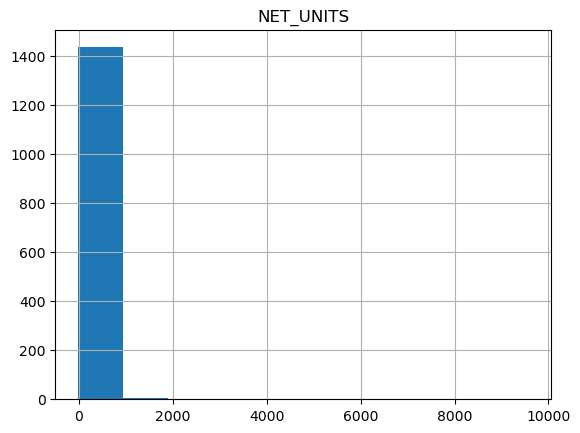

In [8]:
dev_projs.hist('NET_UNITS')

<Axes: >

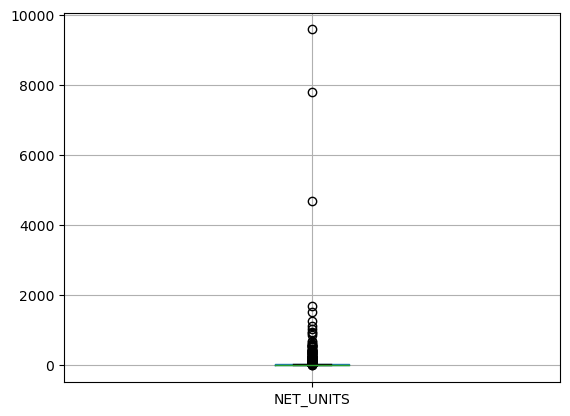

In [11]:
dev_projs.boxplot('NET_UNITS')

<Axes: >

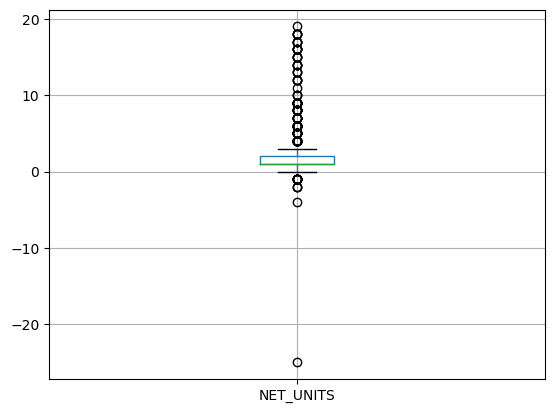

In [15]:
dev_projs[dev_projs['NET_UNITS'] < 20].boxplot('NET_UNITS')

array([[<Axes: title={'center': 'NET_UNITS'}>]], dtype=object)

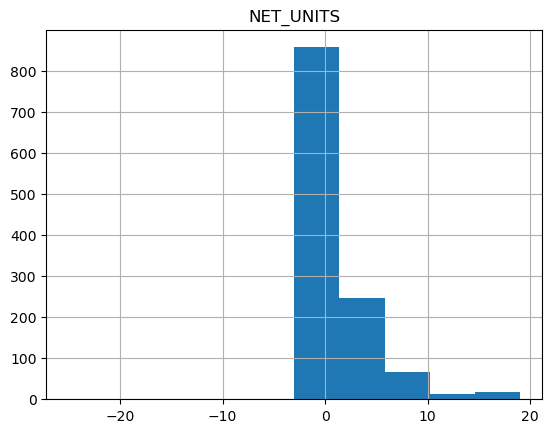

In [16]:
dev_projs[dev_projs['NET_UNITS'] < 20].hist('NET_UNITS')

array([[<Axes: title={'center': 'AFF_UNITS'}>]], dtype=object)

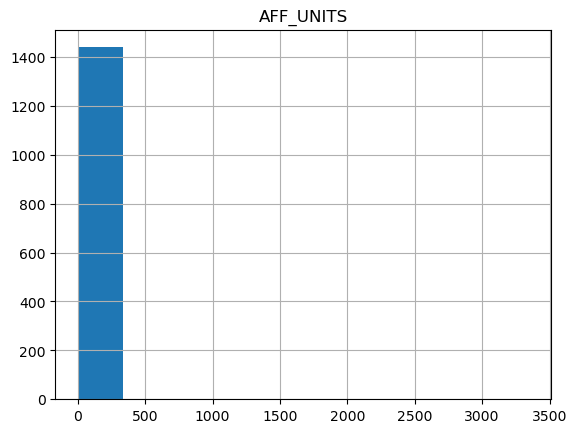

In [17]:
dev_projs.hist('AFF_UNITS')

<Axes: >

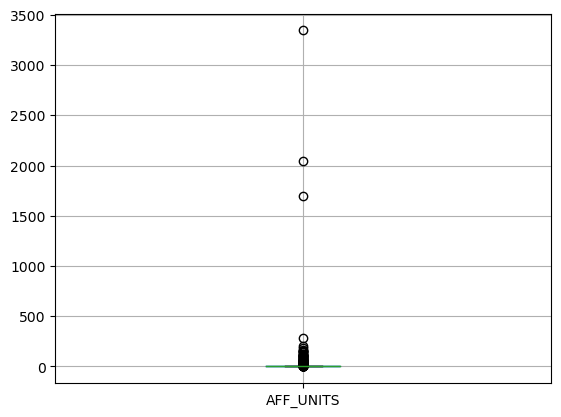

In [18]:
dev_projs.boxplot('AFF_UNITS')

<Axes: >

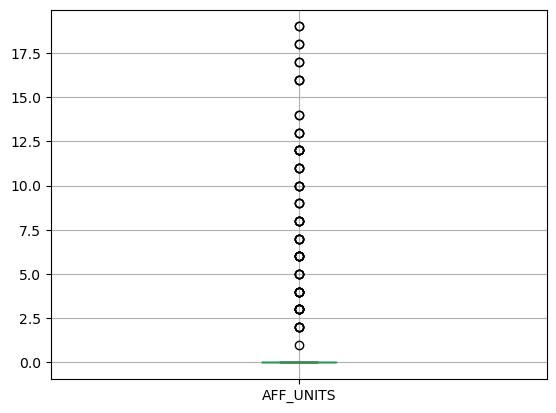

In [20]:
dev_projs[dev_projs['AFF_UNITS'] < 20].boxplot('AFF_UNITS')

array([[<Axes: title={'center': 'AFF_UNITS'}>]], dtype=object)

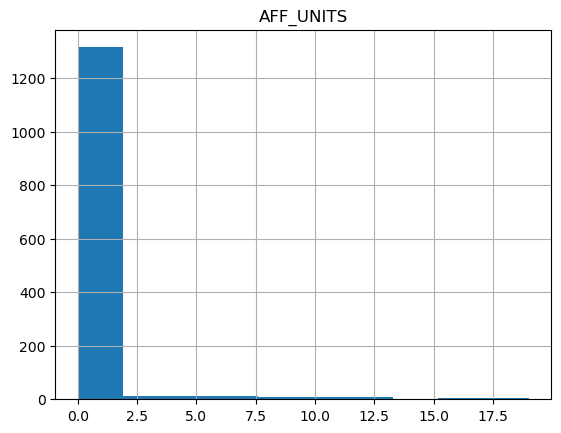

In [21]:
dev_projs[dev_projs['AFF_UNITS'] < 20].hist('AFF_UNITS')

In [24]:
data_dict = pd.read_excel('http://layer.sfplanning.org/PipelineDataDictionary.xlsx')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>